In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df_train=pd.read_csv(r"D:\Courses\ML Dr Mostafa\Projects_last\2 Credit Card Fraud Detection\data\split\train.csv")
df_val=pd.read_csv(r"D:\Courses\ML Dr Mostafa\Projects_last\2 Credit Card Fraud Detection\data\split\val.csv")
df_test=pd.read_csv(r"D:\Courses\ML Dr Mostafa\Projects_last\2 Credit Card Fraud Detection\data\split\test.csv")
pd.set_option("display.max_columns",100)

In [3]:
df_train.head(3)

Time        V1        V2        V3        V4        V5        V6  \
0  119191.0  2.052427 -0.133236 -1.740621  0.277935  0.337999 -0.826933   
1   71750.0  1.220356 -0.159191 -0.444349 -0.094437  0.104457 -0.345790   
2  151977.0  0.892824 -1.440698 -0.637940  3.912871  0.099291  2.433288   

         V7        V8        V9       V10       V11       V12       V13  \
0  0.334629 -0.227039  0.267655  0.293539  0.427682  0.504109 -0.989043   
1  0.170867 -0.094996  0.187572 -0.143353 -0.947576 -0.541060 -0.817426   
2 -0.308891  0.603227 -0.113826  1.057386 -1.317899 -0.768390 -1.081373   

        V14       V15       V16       V17       V18       V19       V20  \
0  0.761661 -0.984511 -0.296433 -0.336666 -0.231668  0.544180 -0.269148   
1  0.564658  1.276676  0.046158 -0.176105 -0.676223  0.038731 -0.033806   
2  0.133451  0.447815  0.575453 -0.158101 -0.903597 -2.798035  0.509795   

        V21       V22       V23       V24       V25       V26       V27  \
0 -0.006518  0.121300  0.037733 -0.356498  0.147822  0.569149 -0.103929   
1 -0.088775 -0.364654 -0.140851 -0.707308  0.415661  1.087767 -0.102532   
2  0.484969  0.487304 -0.122694 -0.598803 -0.594563  0.062841 -0.033426   

        V28  Amount  Class  
0 -0.091958    8.73      0  
1 -0.008335   59.95      0  
2  0.038254  460.65      0

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170884 entries, 0 to 170883
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    170884 non-null  float64
 1   V1      170884 non-null  float64
 2   V2      170884 non-null  float64
 3   V3      170884 non-null  float64
 4   V4      170884 non-null  float64
 5   V5      170884 non-null  float64
 6   V6      170884 non-null  float64
 7   V7      170884 non-null  float64
 8   V8      170884 non-null  float64
 9   V9      170884 non-null  float64
 10  V10     170884 non-null  float64
 11  V11     170884 non-null  float64
 12  V12     170884 non-null  float64
 13  V13     170884 non-null  float64
 14  V14     170884 non-null  float64
 15  V15     170884 non-null  float64
 16  V16     170884 non-null  float64
 17  V17     170884 non-null  float64
 18  V18     170884 non-null  float64
 19  V19     170884 non-null  float64
 20  V20     170884 non-null  float64
 21  V21     17

In [5]:
df_train.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
df_train.describe().T

count          mean           std         min           25%  \
Time    170884.0  94966.107886  47464.723773    0.000000  54348.000000   
V1      170884.0     -0.001070      1.958944  -46.855047     -0.922071   
V2      170884.0     -0.000904      1.650481  -63.344698     -0.599127   
V3      170884.0     -0.002722      1.521820  -48.325589     -0.896376   
V4      170884.0     -0.002603      1.416490   -5.683171     -0.848978   
V5      170884.0      0.000151      1.394123 -113.743307     -0.691840   
V6      170884.0      0.000779      1.338331  -23.496714     -0.768986   
V7      170884.0     -0.000811      1.260122  -43.557242     -0.554440   
V8      170884.0     -0.002327      1.208709  -73.216718     -0.209596   
V9      170884.0     -0.000622      1.098393  -13.434066     -0.642036   
V10     170884.0     -0.001031      1.085747  -24.588262     -0.537197   
V11     170884.0      0.000433      1.021278   -4.682931     -0.763216   
V12     170884.0      0.000659      0.998322  -18.683715     -0.403837   
V13     170884.0     -0.000806      0.994507   -5.791881     -0.649292   
V14     170884.0     -0.000532      0.957929  -18.822087     -0.426709   
V15     170884.0     -0.000266      0.914388   -4.391307     -0.582621   
V16     170884.0     -0.000419      0.879342  -14.129855     -0.468483   
V17     170884.0      0.001986      0.853936  -24.019099     -0.484007   
V18     170884.0     -0.001057      0.839921   -9.498746     -0.500152   
V19     170884.0      0.000185      0.814127   -7.213527     -0.454859   
V20     170884.0     -0.001071      0.778423  -54.497720     -0.211713   
V21     170884.0      0.000957      0.743974  -34.830382     -0.228068   
V22     170884.0      0.000056      0.726681  -10.933144     -0.542831   
V23     170884.0      0.000475      0.620647  -36.666000     -0.161063   
V24     170884.0     -0.000894      0.605148   -2.836627     -0.354552   
V25     170884.0     -0.000593      0.521128   -7.081325     -0.318057   
V26     170884.0     -0.000738      0.481720   -2.604551     -0.327631   
V27     170884.0      0.000404      0.404540   -9.895244     -0.070719   
V28     170884.0      0.000422      0.314973  -15.430084     -0.053019   
Amount  170884.0     88.511723    256.737144    0.000000      5.637500   
Class   170884.0      0.001785      0.042210    0.000000      0.000000   

                 50%            75%            max  
Time    84923.500000  139404.000000  172792.000000  
V1          0.016603       1.316250       2.451888  
V2          0.065839       0.802518      22.057729  
V3          0.177007       1.028302       4.226108  
V4         -0.020895       0.738812      16.875344  
V5         -0.054185       0.612154      34.099309  
V6         -0.274228       0.400359      73.301626  
V7          0.040417       0.569221     120.589494  
V8          0.021461       0.326026      18.282168  
V9         -0.051777       0.595095      10.392889  
V10        -0.094376       0.451011      15.331742  
V11        -0.029338       0.741291      11.669205  
V12         0.140076       0.618087       7.848392  
V13        -0.016291       0.662032       7.126883  
V14         0.050488       0.492867      10.526766  
V15         0.045489       0.647375       8.877742  
V16         0.066737       0.523409      17.315112  
V17        -0.064871       0.403348       9.207059  
V18        -0.005566       0.499790       5.041069  
V19         0.003222       0.458767       5.572113  
V20        -0.062696       0.133128      39.420904  
V21        -0.029547       0.186681      27.202839  
V22         0.006488       0.528971      10.503090  
V23        -0.010688       0.147814      22.528412  
V24         0.040433       0.437888       4.584549  
V25         0.016916       0.350188       6.070850  
V26        -0.051262       0.240718       3.517346  
V27         0.001520       0.091713      31.612198  
V28         0.011216       0.078480      16.129609  
Amount     22.020000      77.650000   25691.160000  

In [7]:
df_train.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
df_train.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
df_train.duplicated().sum()  # is it normal ?

448

In [10]:
df_train[df_train.duplicated()].sort_values(by="Time")

Time        V1        V2        V3        V4        V5        V6  \
142999      26.0 -0.535388  0.865268  1.351076  0.147575  0.433680  0.086983   
122412      74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
76829       74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
77086       74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
153809    1308.0 -1.322313  0.863591  1.844234  1.089375  0.771005  0.152191   
...          ...       ...       ...       ...       ...       ...       ...   
159911  170731.0  2.033492  0.766969 -2.107555  3.631952  1.348594 -0.499907   
122551  170731.0  2.033492  0.766969 -2.107555  3.631952  1.348594 -0.499907   
118330  170731.0  2.033492  0.766969 -2.107555  3.631952  1.348594 -0.499907   
97127   171288.0  1.912550 -0.455240 -1.750654  0.454324  2.089130  4.160019   
63835   171627.0 -1.457978  1.378203  0.811515 -0.603760 -0.711883 -0.471672   

              V7        V8        V9       V10       V11       V12       V13  \
142999  0.693039  0.179742 -0.285642 -0.482474  0.871800  0.853447 -0.571822   
122412 -0.036715  0.350995  0.118950 -0.243289  0.578063  0.674730 -0.534231   
76829  -0.036715  0.350995  0.118950 -0.243289  0.578063  0.674730 -0.534231   
77086  -0.036715  0.350995  0.118950 -0.243289  0.578063  0.674730 -0.534231   
153809  1.491514 -0.917308  0.765538  1.645725 -0.046283  0.097474  0.359237   
...          ...       ...       ...       ...       ...       ...       ...   
159911  0.945159 -0.286392 -1.370581  1.653073 -1.600434 -1.510901 -2.143280   
122551  0.945159 -0.286392 -1.370581  1.653073 -1.600434 -1.510901 -2.143280   
118330  0.945159 -0.286392 -1.370581  1.653073 -1.600434 -1.510901 -2.143280   
97127  -0.881302  1.081750  1.022928  0.005356 -0.541998  0.745036 -0.375165   
63835  -0.282535  0.880654  0.052808 -0.830603 -1.191774  0.942870  1.372621   

             V14       V15       V16       V17       V18       V19       V20  \
142999  0.102252 -1.519991 -0.285912 -0.309633 -0.403902 -0.823743 -0.283264   
122412  0.446601  1.122885 -1.768001  1.241157 -2.449500 -1.747255 -0.335520   
76829   0.446601  1.122885 -1.768001  1.241157 -2.449500 -1.747255 -0.335520   
77086   0.446601  1.122885 -1.768001  1.241157 -2.449500 -1.747255 -0.335520   
153809 -1.218819  0.418677 -1.621802  0.143536 -0.922803  0.752663  0.521105   
...          ...       ...       ...       ...       ...       ...       ...   
159911  1.189850 -0.875588  0.175808 -0.419433 -0.464717 -1.414528 -0.430560   
122551  1.189850 -0.875588  0.175808 -0.419433 -0.464717 -1.414528 -0.430560   
118330  1.189850 -0.875588  0.175808 -0.419433 -0.464717 -1.414528 -0.430560   
97127  -0.068227 -0.795939 -0.497901 -0.134224 -1.004958  0.086074 -0.207620   
63835  -0.037988 -0.208490  0.321883 -0.205951 -0.025225 -0.468427  0.023667   

             V21       V22       V23       V24       V25       V26       V27  \
142999  0.049526  0.206537 -0.187108  0.000753  0.098117 -0.553471 -0.078306   
122412  0.102520  0.605089  0.023092 -0.626463  0.479120 -0.166937  0.081247   
76829   0.102520  0.605089  0.023092 -0.626463  0.479120 -0.166937  0.081247   
77086   0.102520  0.605089  0.023092 -0.626463  0.479120 -0.166937  0.081247   
153809 -0.340315  0.315702 -0.133591  0.107112  0.246560 -0.309290 -0.510963   
...          ...       ...       ...       ...       ...       ...       ...   
159911  0.241894  0.658545 -0.102644  0.580535  0.643637  0.347240 -0.116618   
122551  0.241894  0.658545 -0.102644  0.580535  0.643637  0.347240 -0.116618   
118330  0.241894  0.658545 -0.102644  0.580535  0.643637  0.347240 -0.116618   
97127  -0.524067 -1.337510  0.473943  0.616683 -0.283548 -1.084843  0.073133   
63835   0.284205  0.949659 -0.216949  0.083250  0.044944  0.639933  0.219432   

             V28  Amount  Class  
142999  0.025427    1.77      0  
122412  0.001192    1.18      0  
76829   0.001192    1.18      0  
77086   0.001192    1.18      0 

In [11]:
df_train[df_train.duplicated()]["Class"].value_counts()

Class
0    440
1      8
Name: count, dtype: int64

In [12]:
df_train["Time"].nsmallest(10)

50325      0.0
52043      0.0
66399      1.0
75919      2.0
161453     2.0
23838      7.0
122354    10.0
158267    12.0
63556     13.0
85027     16.0
Name: Time, dtype: float64

In [13]:
df_train["Time"].nlargest(10)

99216     172792.0
168319    172788.0
101774    172784.0
17454     172783.0
127085    172782.0
168164    172782.0
76191     172780.0
2490      172778.0
4348      172774.0
38212     172774.0
Name: Time, dtype: float64

In [14]:
(172792/60)/60

47.99777777777778

In [15]:
df_train["Amount"].nlargest(10)

115783    25691.16
73107     19656.53
26918     18910.00
83157     12910.93
153398    11898.09
45640     10199.44
134388     8790.26
64500      8360.00
64560      7862.39
103953     7636.30
Name: Amount, dtype: float64

In [16]:
df_train["Amount"].nsmallest(10)

370     0.0
804     0.0
1042    0.0
1662    0.0
1853    0.0
2029    0.0
2284    0.0
2554    0.0
2682    0.0
2906    0.0
Name: Amount, dtype: float64

In [17]:
df_train["Class"].value_counts()

Class
0    170579
1       305
Name: count, dtype: int64

In [18]:
gp=df_train.groupby(["Class"])[["Amount","Time"]].agg(["sum","mean",])
gp

Amount                      Time              
               sum        mean           sum          mean
Class                                                     
0      15086579.21   88.443356  1.620415e+10  94994.996301
1         38658.06  126.747738  2.403691e+07  78809.527869

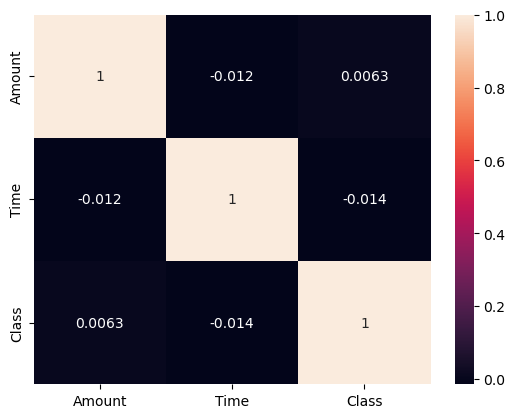

In [19]:
sns.heatmap(df_train[["Amount","Time","Class"]].corr(),annot=True)
plt.show()

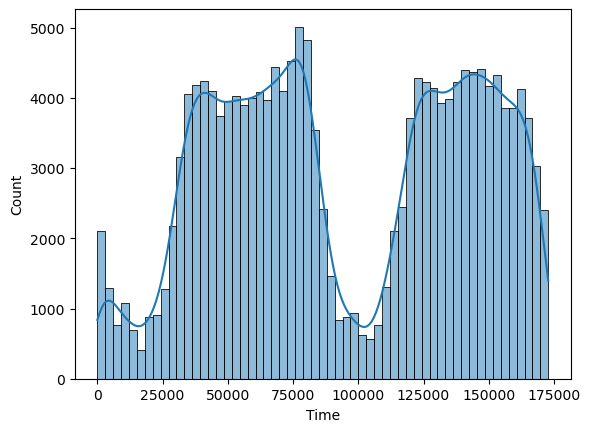

In [20]:
sns.histplot(df_train["Time"],kde=True)
plt.show()

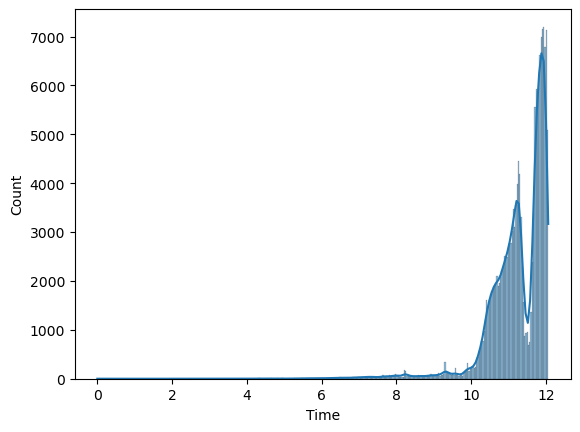

In [21]:
df_log=np.log1p(df_train["Time"])
sns.histplot(df_log,kde=True)
plt.show()

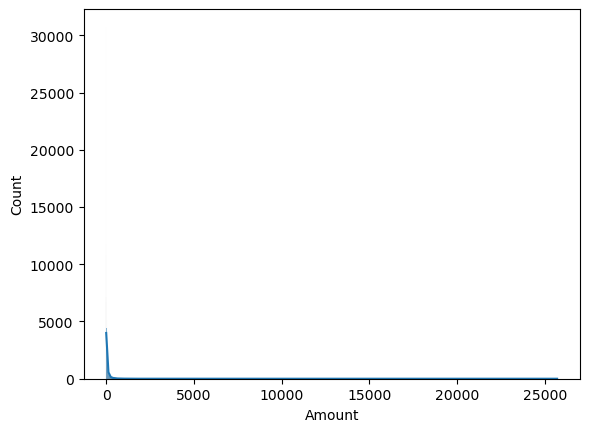

In [22]:
sns.histplot(df_train["Amount"],kde=True)
plt.show()

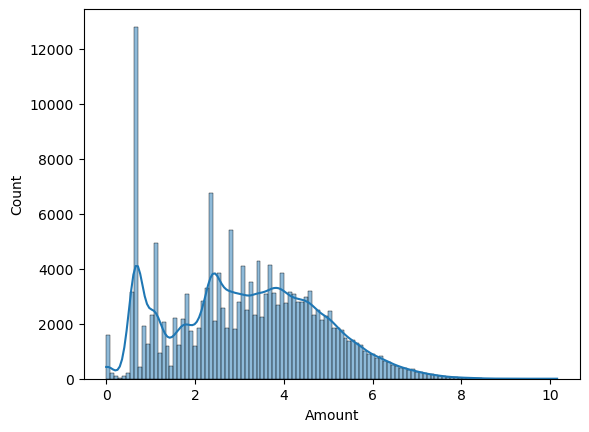

In [23]:
df_log=np.log1p(df_train["Amount"])
sns.histplot(df_log,kde=True)
plt.show()

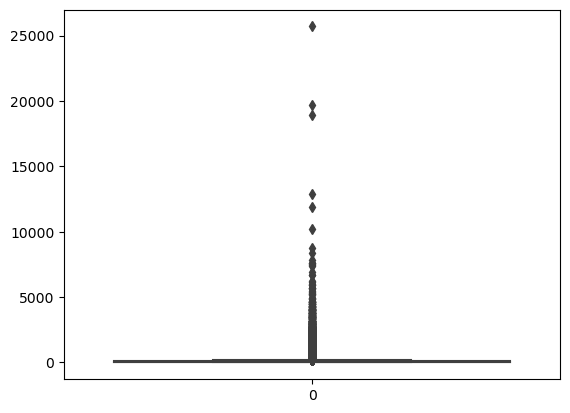

In [24]:
sns.boxplot(df_train["Amount"])
plt.show()

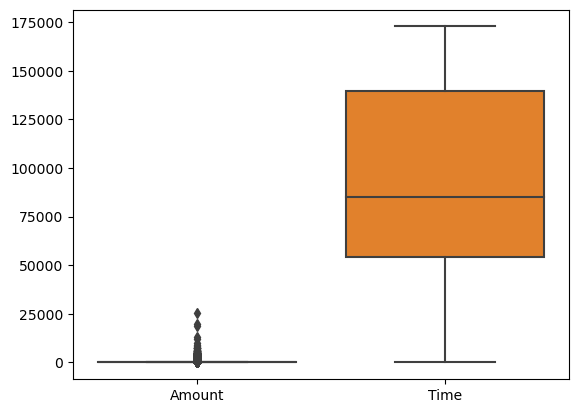

In [25]:
sns.boxplot(df_train[["Amount","Time"]])
plt.show()

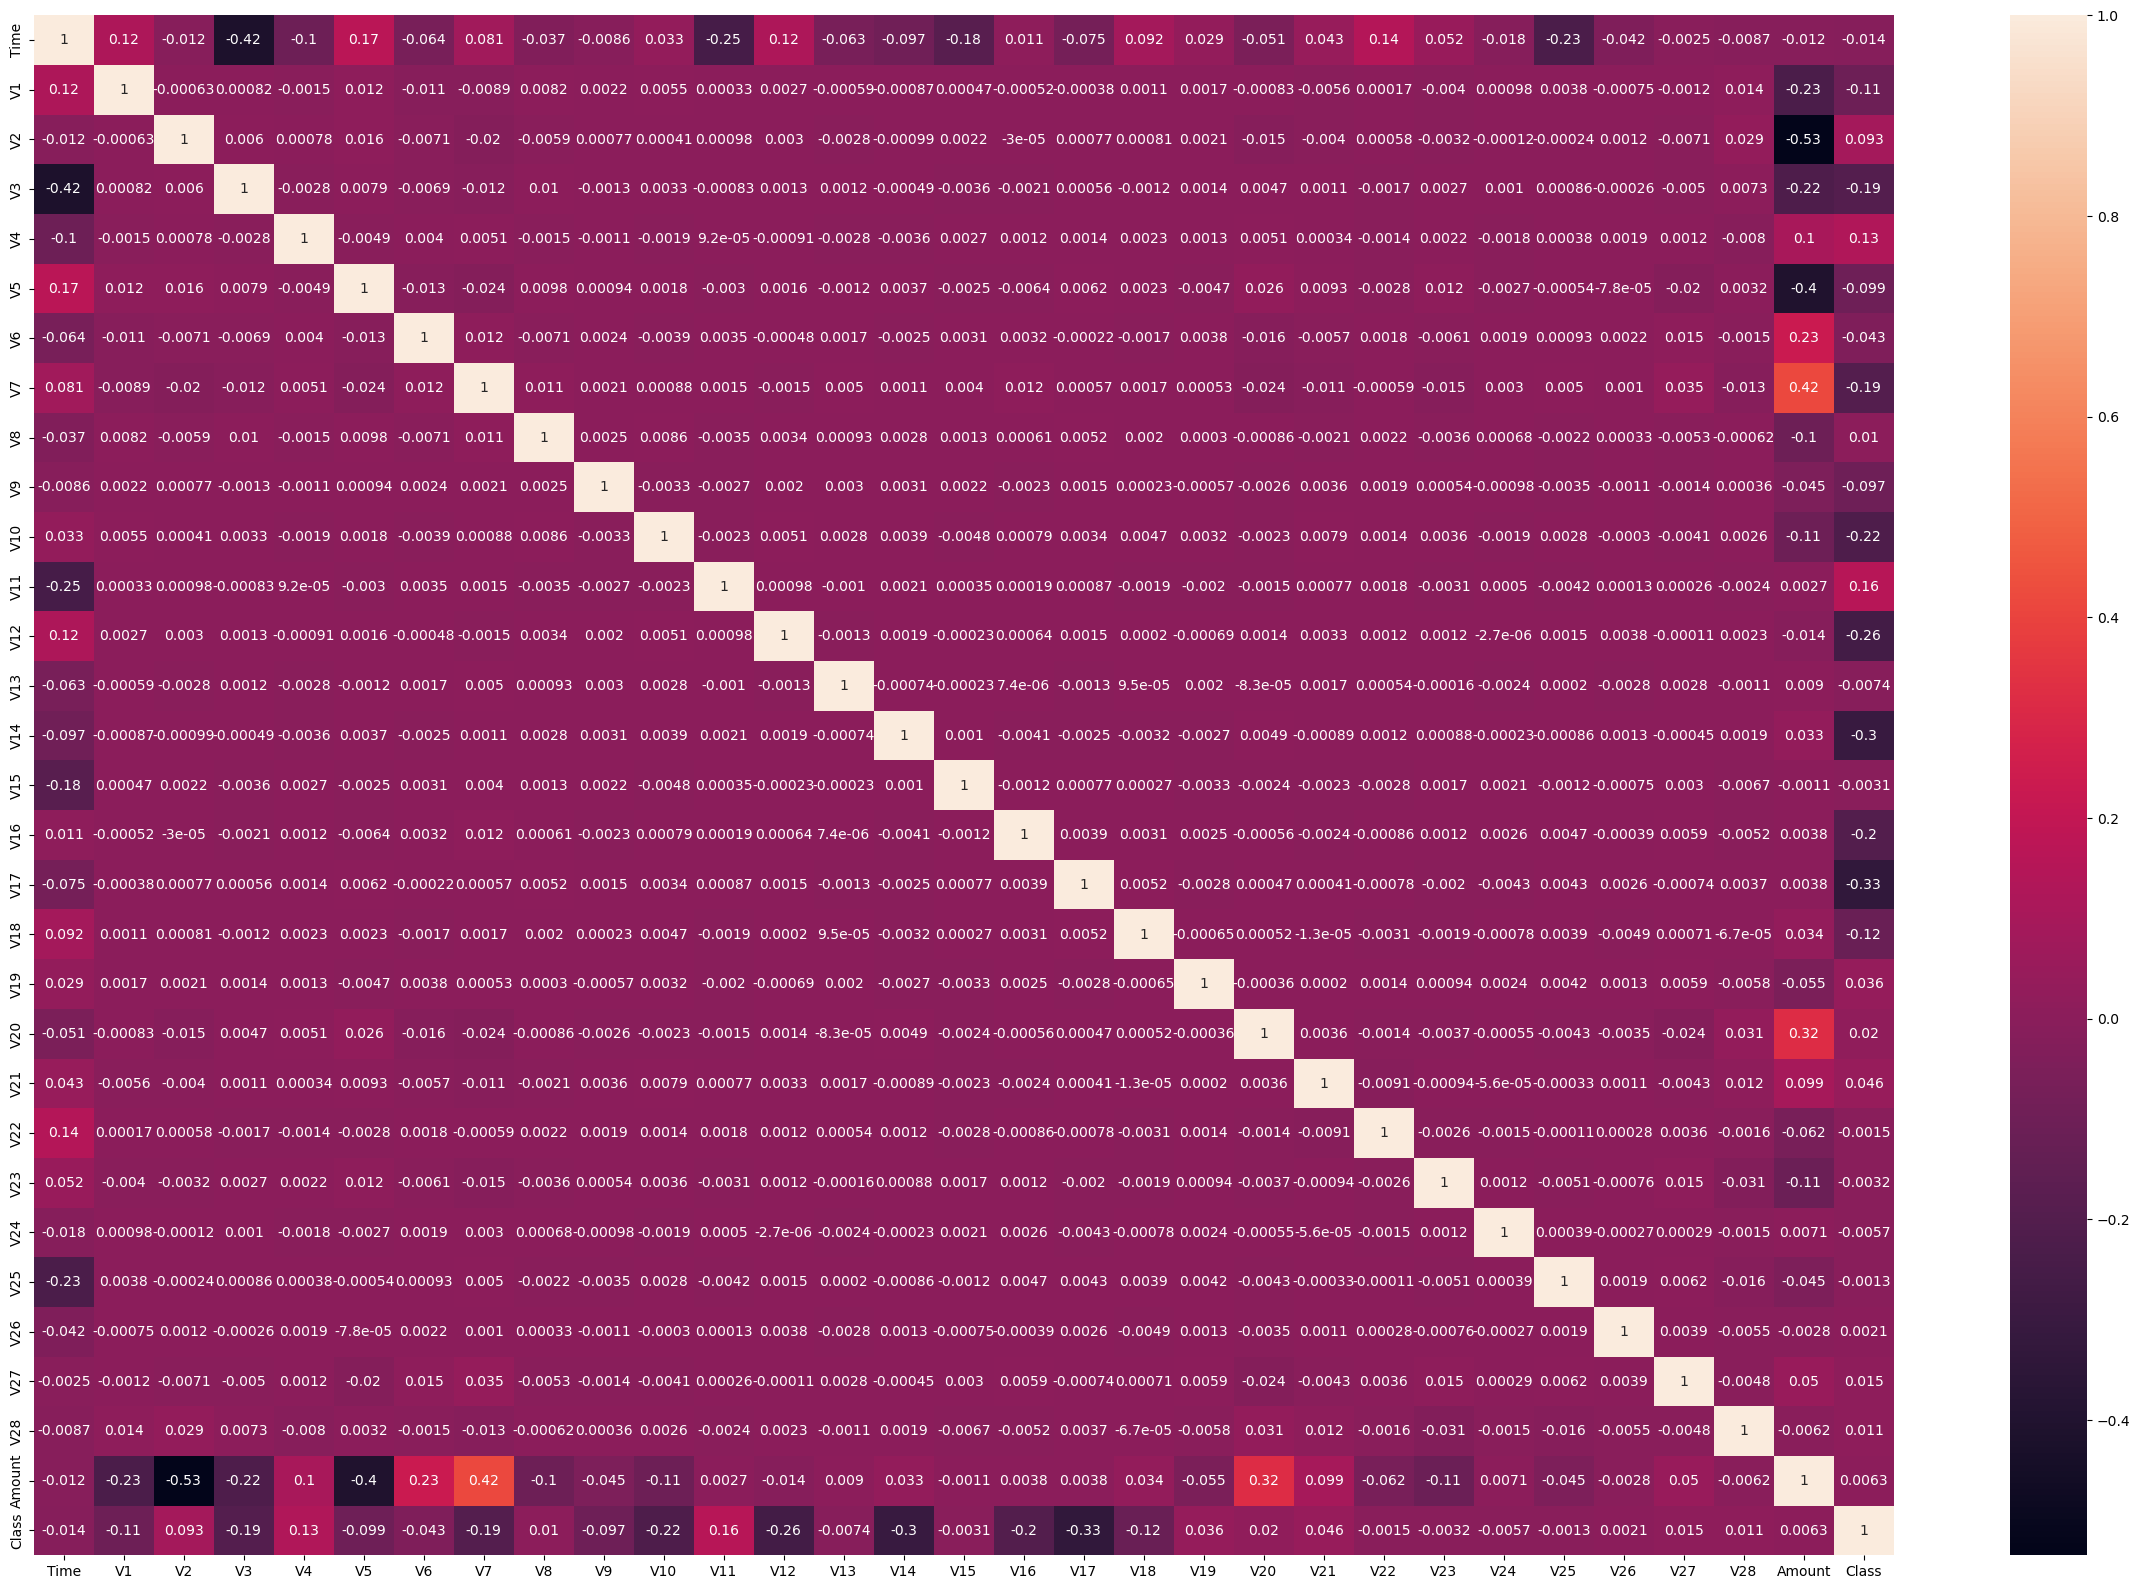

In [26]:
plt.figure(figsize=(30,20))
sns.heatmap(df_train.corr(),annot=True)
plt.show()

In [27]:
f=df_train["Class"]==1
df_train_fruad=df_train[f]
f=df_train["Class"]==0
df_train_not_fruad=df_train[f]

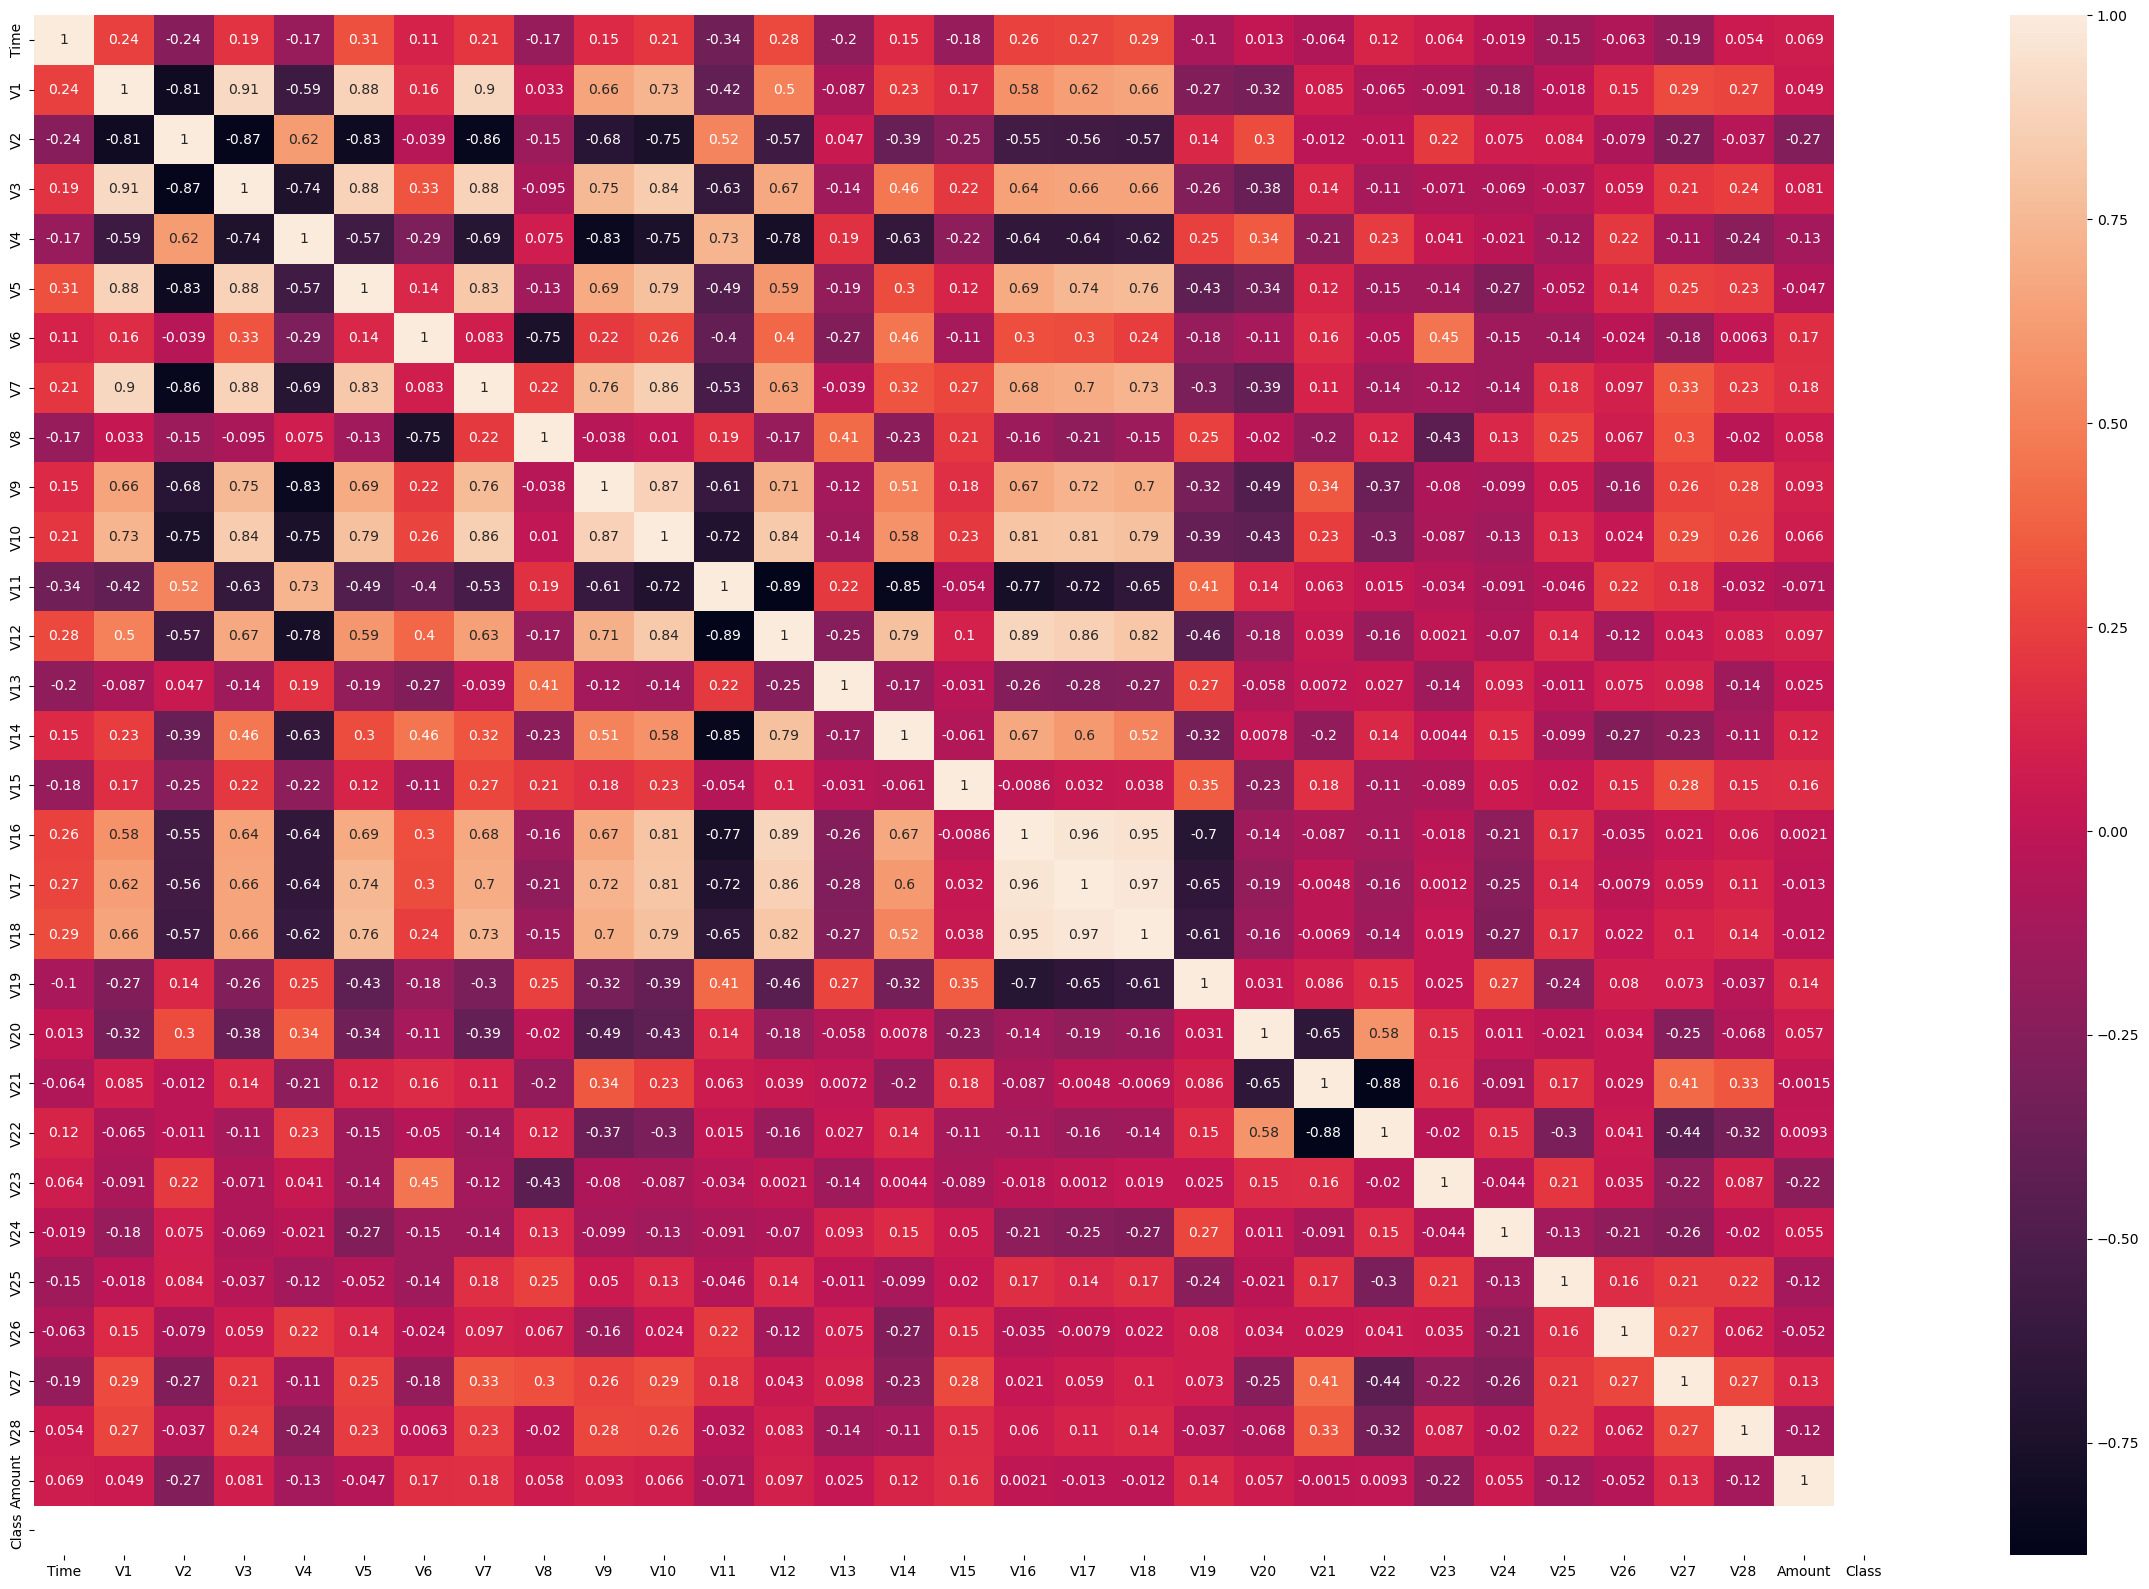

In [28]:
plt.figure(figsize=(30,20))
sns.heatmap(df_train_fruad.corr(),annot=True)
plt.show()

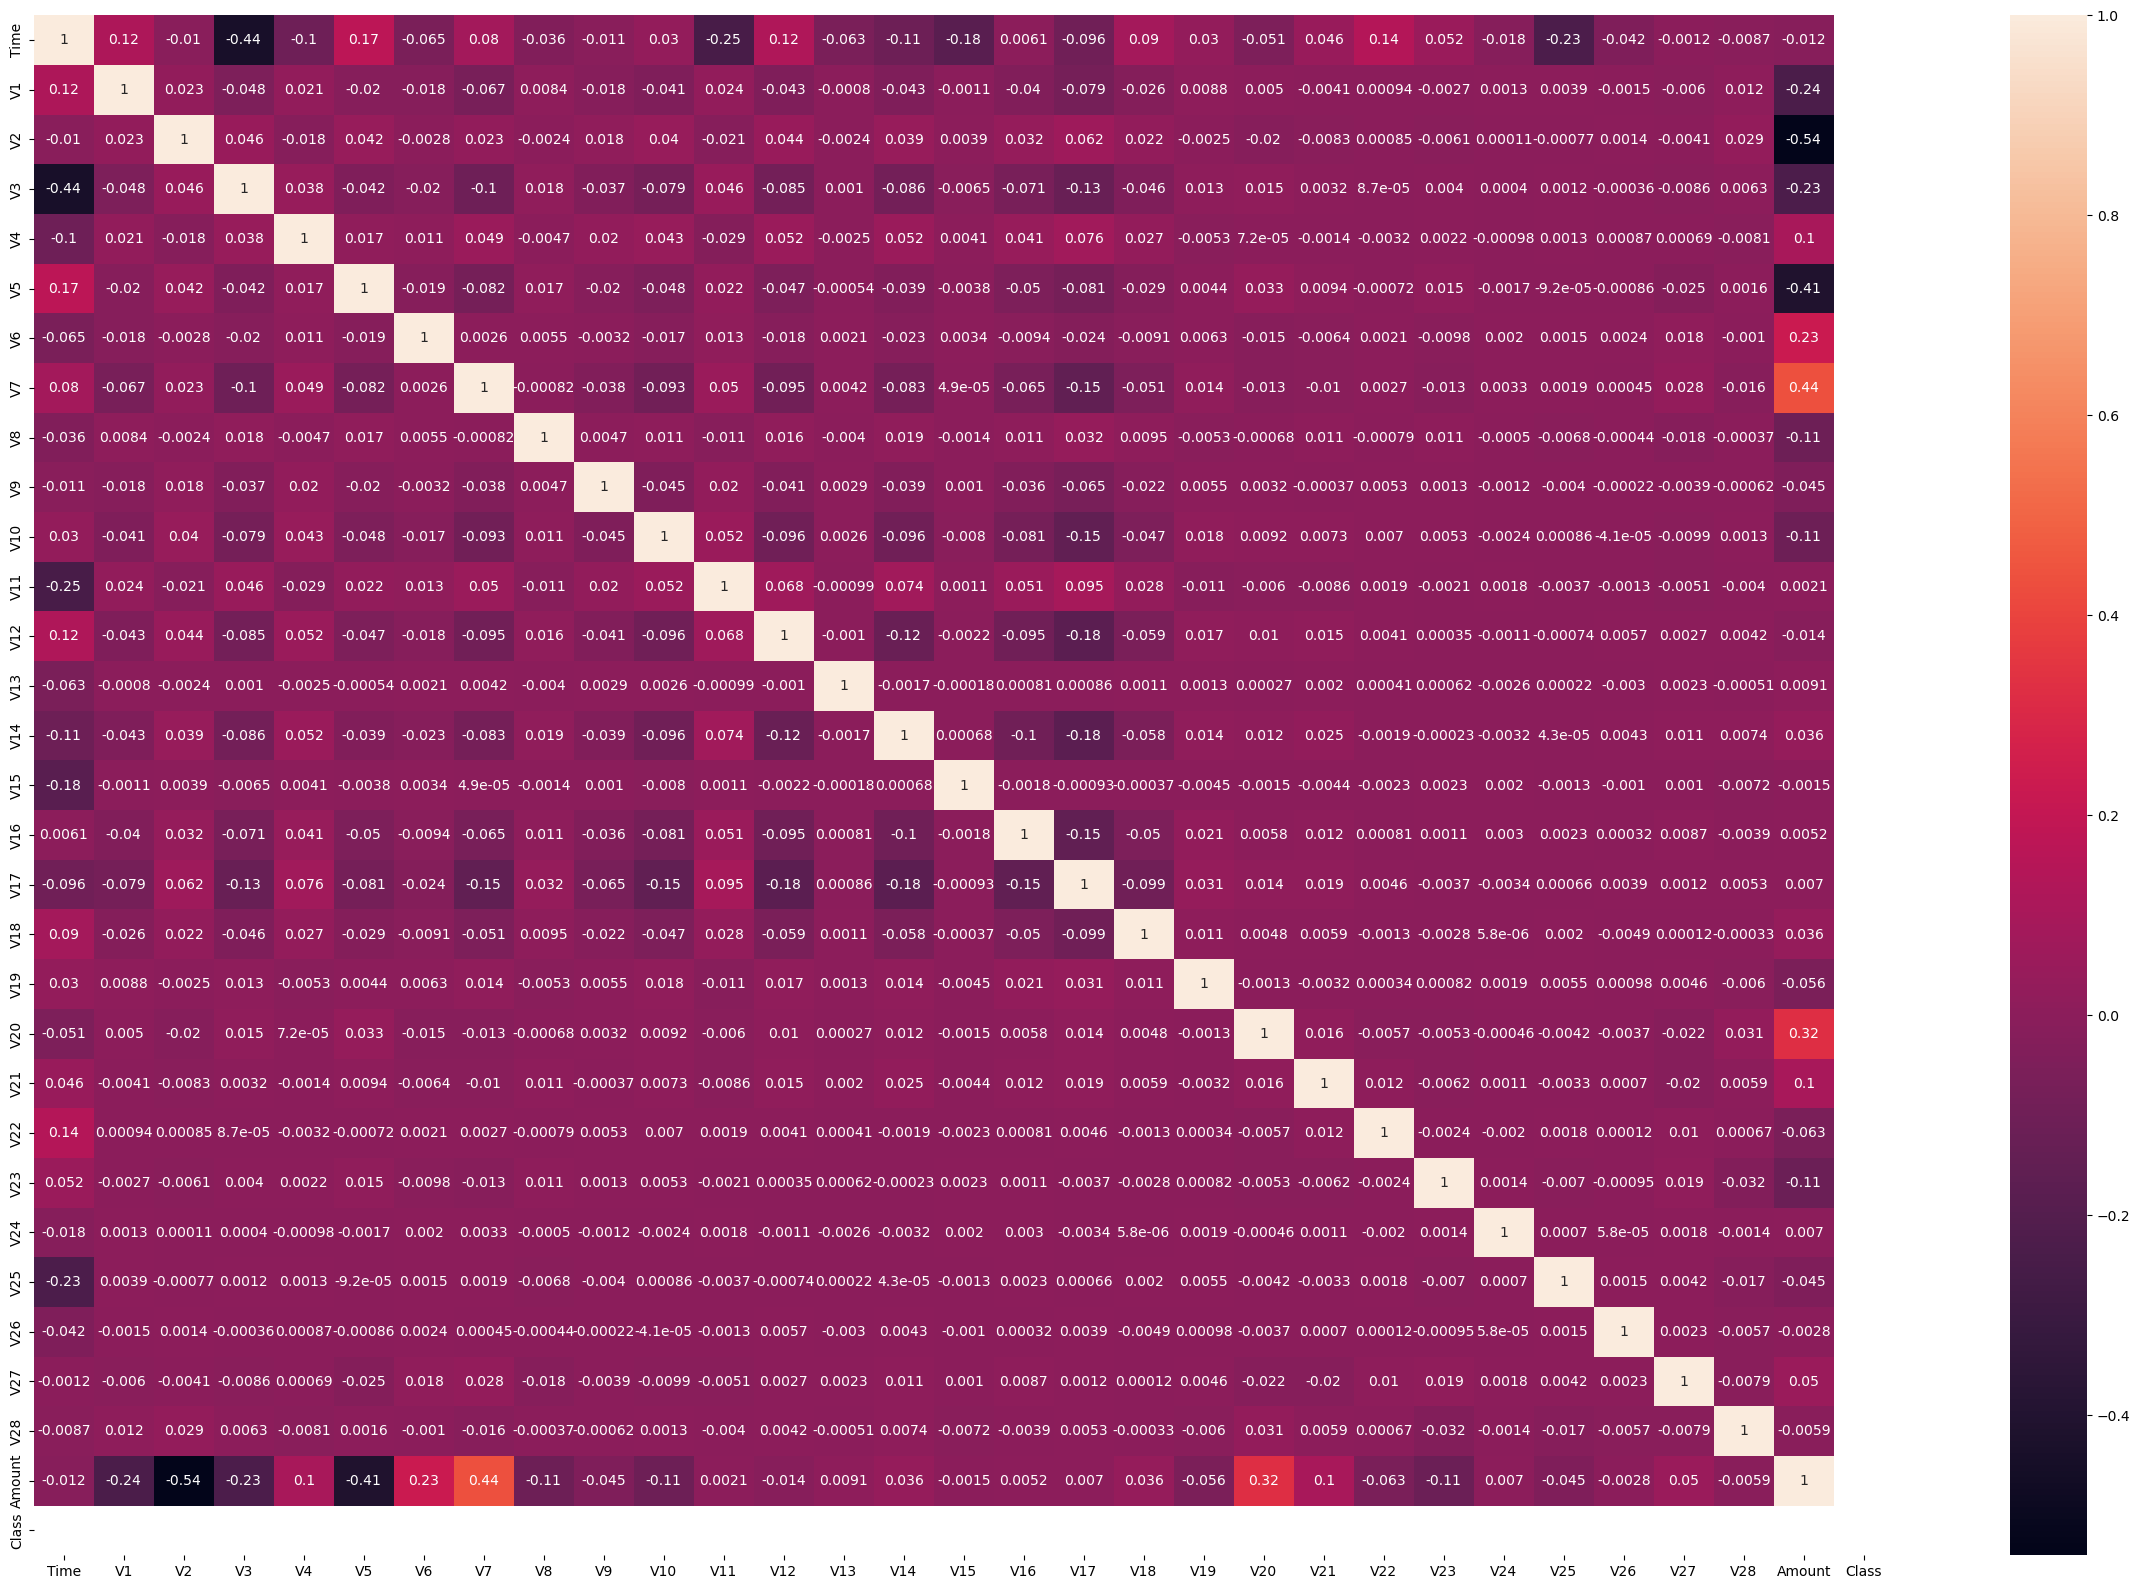

In [29]:
plt.figure(figsize=(30,20))
sns.heatmap(df_train_not_fruad.corr(),annot=True)
plt.show()

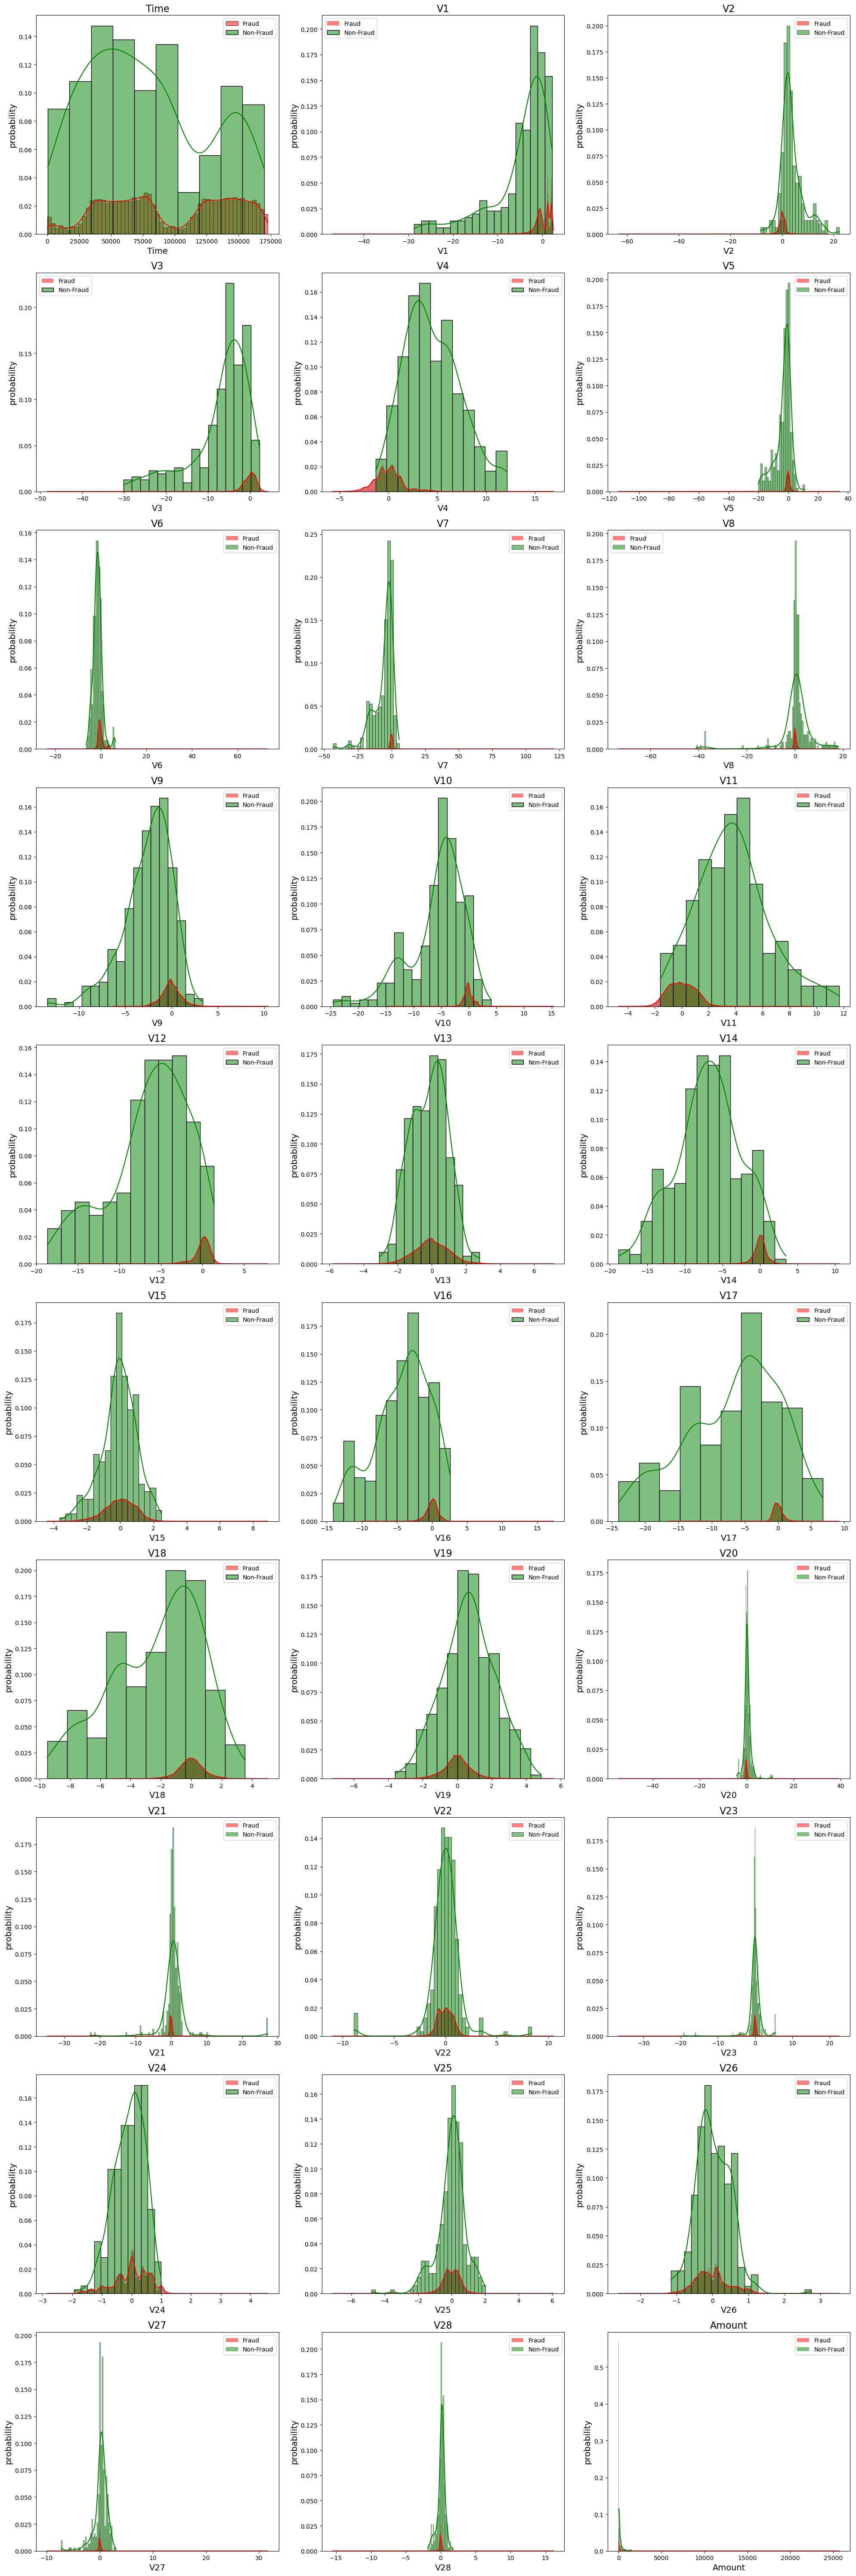

In [30]:
figure = plt.figure(figsize=(20, 60))
for i, col in enumerate(df_train.columns.to_list()):
    if col == 'Class':
        continue
    plt.subplot(10, 3, i + 1)
    sns.histplot(df_train_not_fruad[col], color='red', label='Fraud',stat='probability', kde=True, fill=True, alpha=0.5) 
    sns.histplot(df_train_fruad[col], color='green', label='Non-Fraud',stat='probability', kde=True, fill=True, alpha=0.5)
    plt.title(col, fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('probability', fontsize=14)
    plt.legend()
plt.tight_layout()
plt.show()

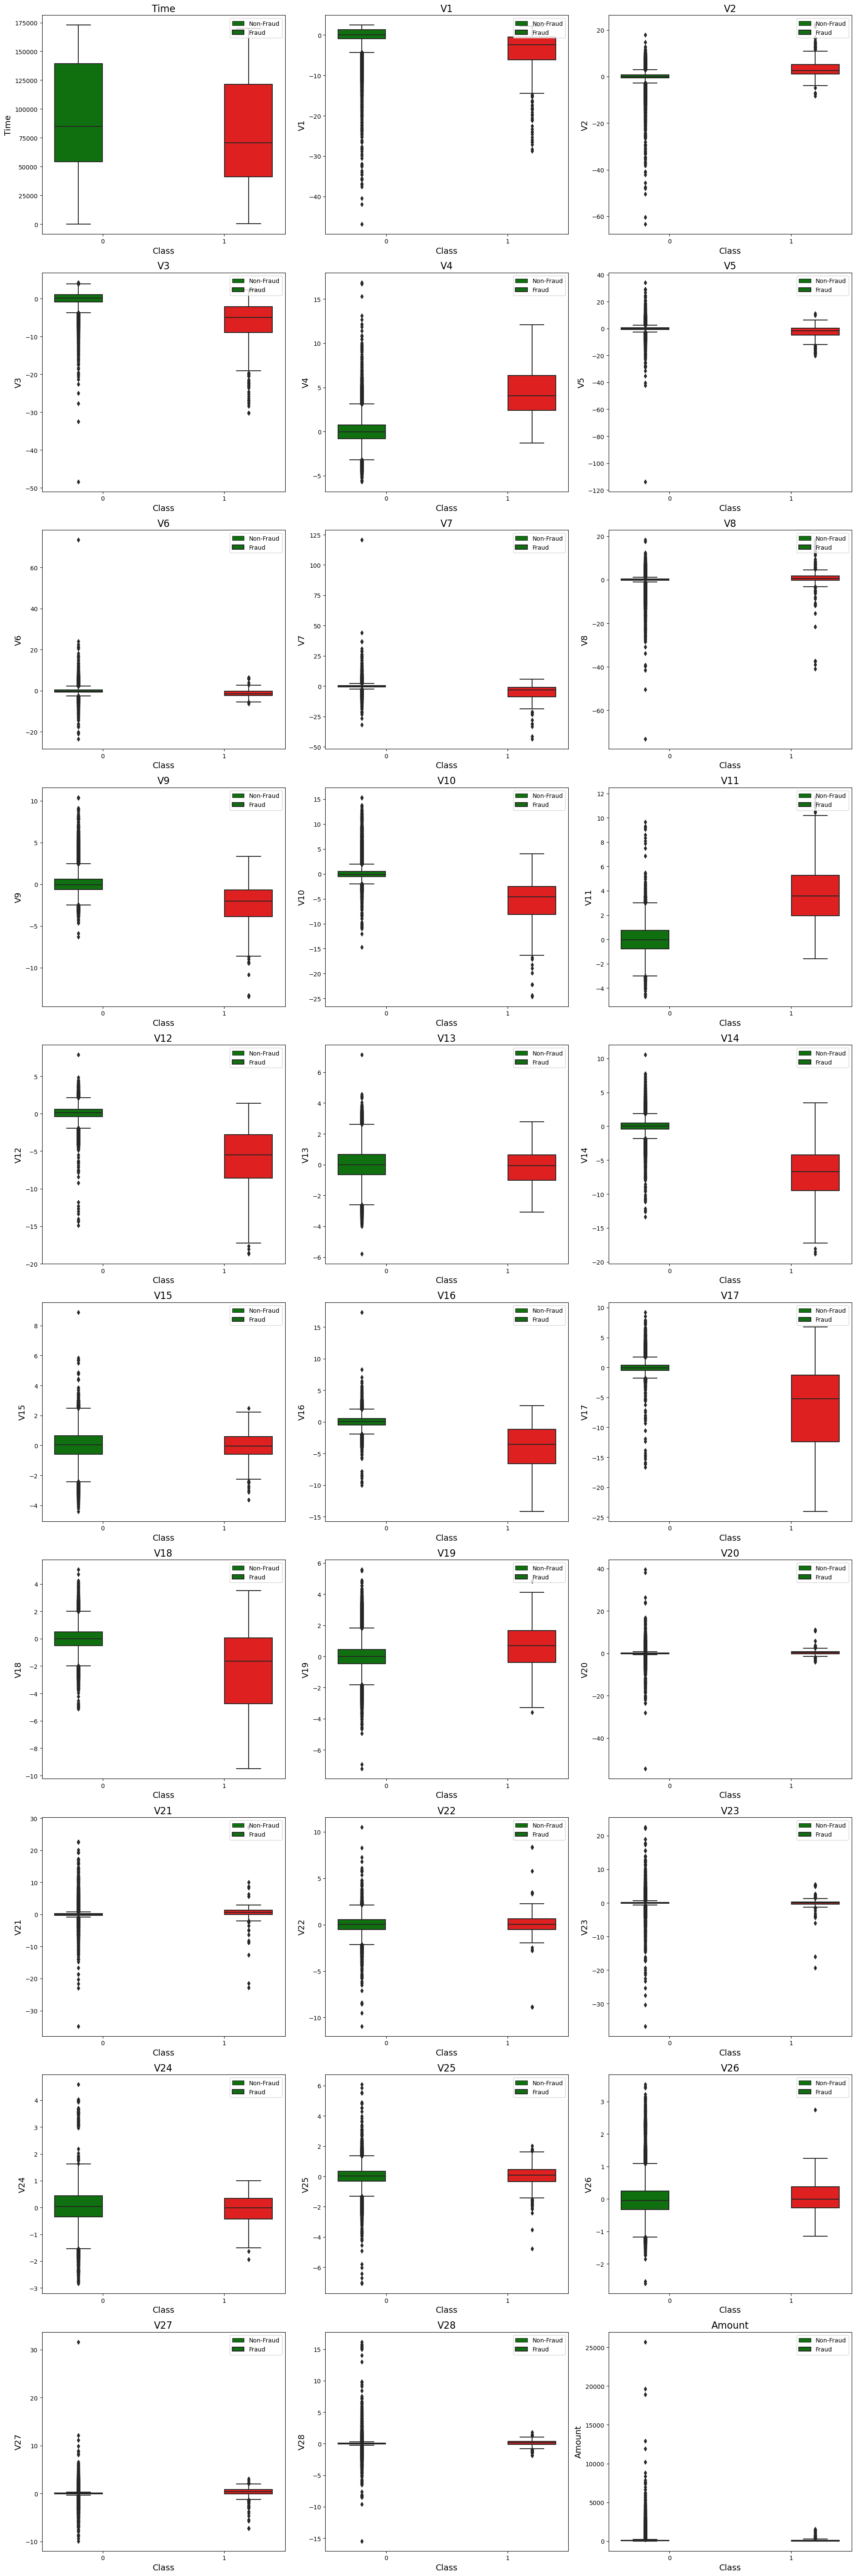

In [31]:
figure = plt.figure(figsize=(20, 60))
for i, col in enumerate(df_train.columns.to_list()):
    if col == 'Class':
        continue
    plt.subplot(10, 3, i + 1)
    sns.boxplot(x='Class', y=col, data=df_train, hue='Class',palette=['green', 'red'])
    plt.title(col, fontsize=16)
    plt.xlabel('Class', fontsize=14)
    plt.ylabel(col, fontsize=14)
    plt.legend(labels=['Non-Fraud', 'Fraud'], loc='upper right')
plt.tight_layout()
plt.show()

In [3]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [33]:
pca=PCA(n_components=2)
y=df_train["Class"]
x=df_train.drop(columns=["Class"])

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x_pca=pca.fit_transform(x_scaled)


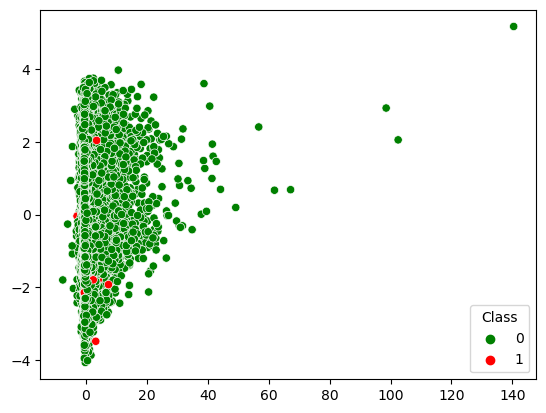

In [34]:
#plt.scatter(x_tsne[:,0],x_tsne[:,1],cmap=y)
sns.scatterplot(x=x_pca[:,0], y=x_pca[:,1], hue=y, palette=['green', 'red'])
plt.show()

In [48]:
!pip install imbalanced-learn==0.12.3

  Obtaining dependency information for imbalanced-learn==0.12.3 from https://files.pythonhosted.org/packages/5a/fa/267de06c95210580f4b82b45cec1ce1e9ce1f21a01a684367db89e7da70d/imbalanced_learn-0.12.3-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.3 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/258.3 kB 660.6 kB/s eta 0:00:01
   ------------- ------------------------- 92.2/258.3 kB 871.5 kB/s eta 0:00:01
   ---------------------------------- ----- 225.3/258.3 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------- 258.3/258.3 kB 1.3 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.8.0
    Uninstalling imbalanced-learn-0.8.0:
      Successfully uninstalled imbalanced-learn-0.8.0


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report ,confusion_matrix ,precision_recall_curve,auc
from sklearn.preprocessing import StandardScaler ,MinMaxScaler ,FunctionTransformer ,PolynomialFeatures
from sklearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler 
from imblearn.over_sampling import RandomOverSampler,SMOTE
from sklearn.ensemble import RandomForestClassifier ,VotingClassifier
from sklearn.svm import SVC, OneClassSVM
from xgboost import XGBClassifier as xgbc
from sklearn.neighbors import KNeighborsClassifier

from sklearn.decomposition import PCA


In [5]:
def data_prepare (df_train,df_val,degree=1,over_or_under="under",under_res_factor=1,over_res_factor=1,pca_or_not="not",n_pca=7): 
    
    y_train=df_train["Class"]
    x_train=df_train.drop(columns=["Class"])

    len_1=y_train[y_train==1].shape[0]
    len_0=y_train[y_train==0].shape[0]
    
    y_val=df_val["Class"]
    x_val=df_val.drop(columns=["Class"])
    
    if over_or_under=="under": 
        under_res=RandomUnderSampler(sampling_strategy={0:round(len_1*under_res_factor),1:len_1},random_state=42)
        x_res,y_res=under_res.fit_resample(x_train,y_train)

    elif over_or_under=="over" : 
        over_res=RandomOverSampler(sampling_strategy={0:len_0,1:round(len_0*over_res_factor)},random_state=42)
        x_res,y_res=over_res.fit_resample(x_train,y_train)  

    elif over_or_under=="smote": 
        over_res_smote=SMOTE(k_neighbors=5,random_state=42)
        x_res,y_res=over_res_smote.fit_resample(x_train,y_train)  

    else: 
        x_res,y_res=x_train,y_train 

    if pca_or_not=="pca":
        pipeline_pre=Pipeline(steps=[("scaler",StandardScaler()),
                                     ("poly",PolynomialFeatures(degree=degree,include_bias=True)),
                                     ("pca",PCA(n_components=n_pca,random_state=42))
                                    ])
        x_train=pipeline_pre.fit_transform(x_res)
        x_val=pipeline_pre.transform(x_val)
    
        y_train=y_res
    else:
        
        pipeline_pre=Pipeline(steps=[("scaler",StandardScaler()),
                                     ("poly",PolynomialFeatures(degree=degree,include_bias=True))
                                     
                                    ])
        x_train=pipeline_pre.fit_transform(x_res)
        x_val=pipeline_pre.transform(x_val)
    
        y_train=y_res

    return x_train,y_train,x_val,y_val,pipeline_pre

In [6]:
x_train,y_train,x_val,y_val,pipeline_pre=data_prepare (df_train,df_val,degree=2,over_or_under="under",under_res_factor=1,over_res_factor=1,pca_or_not="not",n_pca=7)

In [7]:
x_train.shape,y_train.shape,x_val.shape,y_val.shape

((610, 496), (610,), (56960, 496), (56960,))

In [8]:
pipeline_pre

Pipeline(steps=[('scaler', StandardScaler()), ('poly', PolynomialFeatures())])

In [9]:
def train_val_models(model,x_train,y_train,x_val,y_val): 
    
    model.fit(x_train,y_train)
    
    y_train_predict=model.predict(x_train) 
    y_train_predict_prop=model.predict_proba(x_train)[:,1]

    y_val_predict=model.predict(x_val)  
    y_val_predict_prop=model.predict_proba(x_val)[:,1]
    
    confusion_train=confusion_matrix(y_train,y_train_predict)
    train_report=classification_report(y_train,y_train_predict, output_dict=True)

    val_report=classification_report(y_val,y_val_predict, output_dict=True)
    confusion_val=confusion_matrix(y_val,y_val_predict)  

    f1_train_postive=train_report['1']['f1-score']
    f1_val_postive=val_report['1']['f1-score']

    f1_macro_avg_train_postive=train_report['macro avg']['f1-score']

    f1_macro_avg_val_postive=val_report['macro avg']['f1-score']


    train_report=classification_report(y_train,y_train_predict)
    
    val_report=classification_report(y_val,y_val_predict)
    
    print(f"{model}:::\n train\n\n {confusion_train}\n\n {train_report} ")
    
    print(f"::::::\n     val\n\n {confusion_val}\n\n {val_report} ")
    
    return model, x_train,y_train,y_train_predict_prop,y_train_predict,x_val,y_val,y_val_predict_prop,y_val_predict,f1_train_postive,f1_val_postive,f1_macro_avg_train_postive,f1_macro_avg_val_postive

In [10]:
def pr_curve(y_train,y_train_predict_prop,y_val,y_val_predict_prop): 
    
    pt,rt,tht=precision_recall_curve(y_train,y_train_predict_prop)
    pv,rv,thv=precision_recall_curve(y_val,y_val_predict_prop)

    pr_auc_train=auc(rt,pt)
    pr_auc_val=auc(rv,pv)
    
    print(f"pr_auc_train= {pr_auc_train}")
    print(f"pr_auc_val= {pr_auc_val}")
    
    plt.plot(tht,pt[:-1],label="p_train")
    plt.plot(tht,rt[:-1],label="r_train")
    plt.title("pr_curve_train")
    plt.xlabel("thresholds")
    plt.legend()
    plt.show()

    plt.plot(thv,pv[:-1],label="p_val")
    plt.plot(thv,rv[:-1],label="r_val")
    plt.title("pr_curve_val")
    plt.xlabel("thresholds")
    plt.legend()
    plt.show()

    return pt,rt,tht,pv,rv,thv,pr_auc_train,pr_auc_val

# LogisticRegression model with & without resampling 

In [11]:
def lr_model(df_train,df_val,degree=1,over_or_under="none",under_res_factor=1,over_res_factor=1,cw=None,pca_or_not="not",n_pca=7): 
    
    
    x_train,y_train,x_val,y_val,pipeline_pre=data_prepare (df_train,df_val,degree=degree,over_or_under=over_or_under,under_res_factor=under_res_factor,over_res_factor=over_res_factor,pca_or_not=pca_or_not,n_pca=n_pca)

    model, x_train,y_train,y_train_predict_prop,y_train_predict,x_val,y_val,y_val_predict_prop,y_val_predict,f1_train_postive,f1_val_postive,f1_macro_avg_train_postive,f1_macro_avg_val_postive=train_val_models(LogisticRegression(class_weight=cw,random_state=42),x_train,y_train,x_val,y_val)

    pt,rt,tht,pv,rv,thv,pr_auc_train,pr_auc_val=pr_curve(y_train,y_train_predict_prop,y_val,y_val_predict_prop) #(y_train,y_train_predict_prop,y_val,y_val_predict_prop)

    hist_lr={"model":model,
            "pipeline_pre":pipeline_pre,
             "over_or_under":over_or_under,
             "degree":degree ,
             "under_res_factor":under_res_factor, 
             "over_res_factor":over_res_factor,
             "class_weight":cw,
             "pca_or_not":pca_or_not, 
             "n_pca":n_pca, 
            "pr_auc_train":pr_auc_train, 
            "pr_auc_val":pr_auc_val, 
            "f1_train_postive":f1_train_postive, 
            "f1_val_postive":f1_val_postive, 
            "f1_macro_avg_train_postive":f1_macro_avg_train_postive, 
            "f1_macro_avg_val_postive":f1_macro_avg_val_postive}
    
    return hist_lr
    

LogisticRegression(random_state=42):::
 train

 [[170557     22]
 [   100    205]]

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    170579
           1       0.90      0.67      0.77       305

    accuracy                           1.00    170884
   macro avg       0.95      0.84      0.89    170884
weighted avg       1.00      1.00      1.00    170884
 
::::::
     val

 [[56864     6]
 [   32    58]]

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56870
           1       0.91      0.64      0.75        90

    accuracy                           1.00     56960
   macro avg       0.95      0.82      0.88     56960
weighted avg       1.00      1.00      1.00     56960
 
pr_auc_train= 0.7841060415182637
pr_auc_val= 0.766014920274573


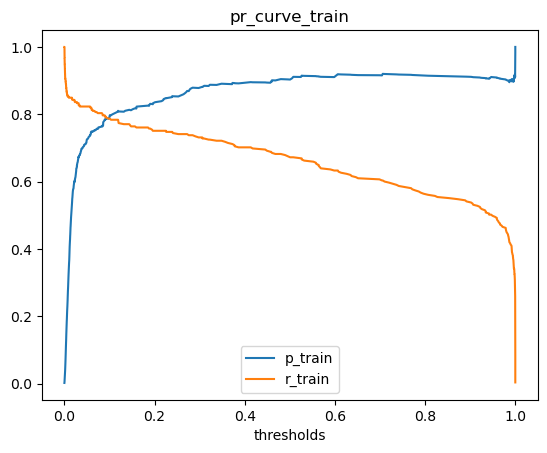

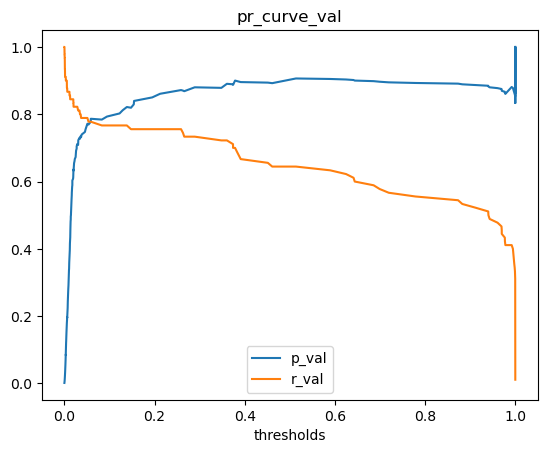

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42):::
 train

 [[170572      7]
 [    45    260]]

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    170579
           1       0.97      0.85      0.91       305

    accuracy                           1.00    170884
   macro avg       0.99      0.93      0.95    170884
weighted avg       1.00      1.00      1.00    170884
 
::::::
     val

 [[56866     4]
 [   26    64]]

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56870
           1       0.94      0.71      0.81        90

    accuracy                           1.00     56960
   macro avg       0.97      0.86      0.90     56960
weighted avg       1.00      1.00      1.00     56960
 
pr_auc_train= 0.9136782983480983
pr_auc_val= 0.7680461901208879


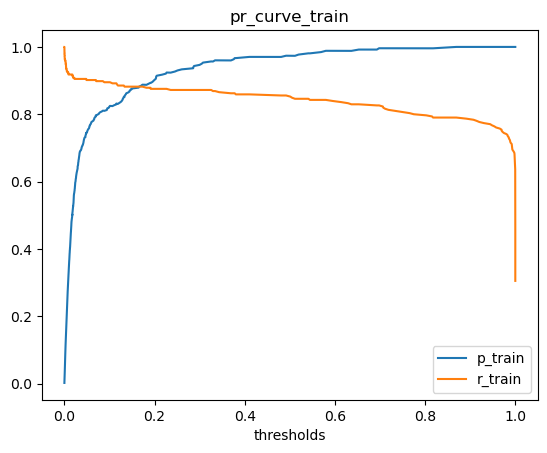

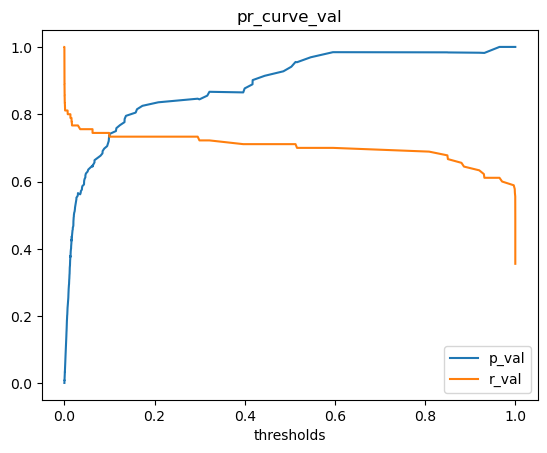

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight={0: 1, 1: 0.06}, random_state=42):::
 train

 [[170578      1]
 [   204    101]]

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    170579
           1       0.99      0.33      0.50       305

    accuracy                           1.00    170884
   macro avg       0.99      0.67      0.75    170884
weighted avg       1.00      1.00      1.00    170884
 
::::::
     val

 [[56867     3]
 [   62    28]]

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56870
           1       0.90      0.31      0.46        90

    accuracy                           1.00     56960
   macro avg       0.95      0.66      0.73     56960
weighted avg       1.00      1.00      1.00     56960
 
pr_auc_train= 0.7219326196239435
pr_auc_val= 0.7291746500273435


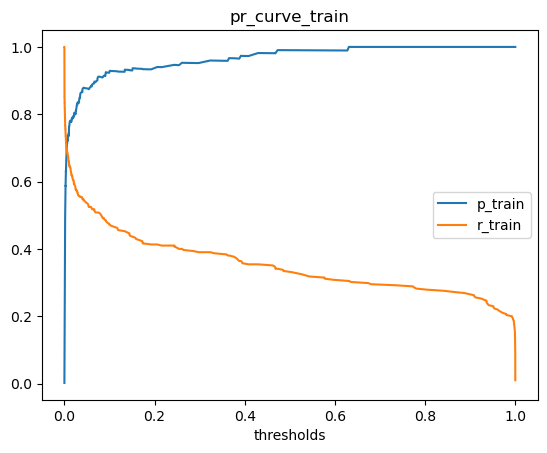

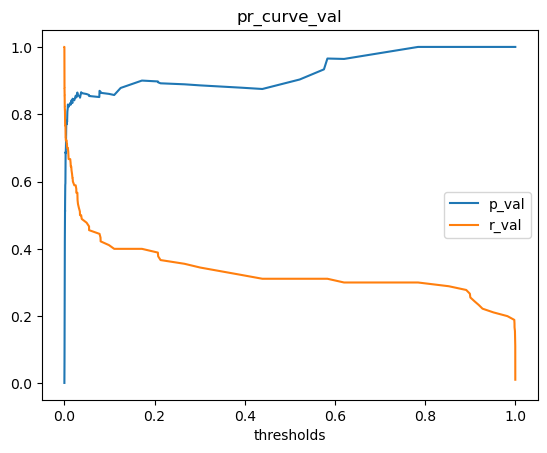

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight={0: 1, 1: 0.06}, random_state=42):::
 train

 [[170579      0]
 [    66    239]]

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    170579
           1       1.00      0.78      0.88       305

    accuracy                           1.00    170884
   macro avg       1.00      0.89      0.94    170884
weighted avg       1.00      1.00      1.00    170884
 
::::::
     val

 [[56868     2]
 [   32    58]]

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56870
           1       0.97      0.64      0.77        90

    accuracy                           1.00     56960
   macro avg       0.98      0.82      0.89     56960
weighted avg       1.00      1.00      1.00     56960
 
pr_auc_train= 0.8667000203500925
pr_auc_val= 0.7688205054359708


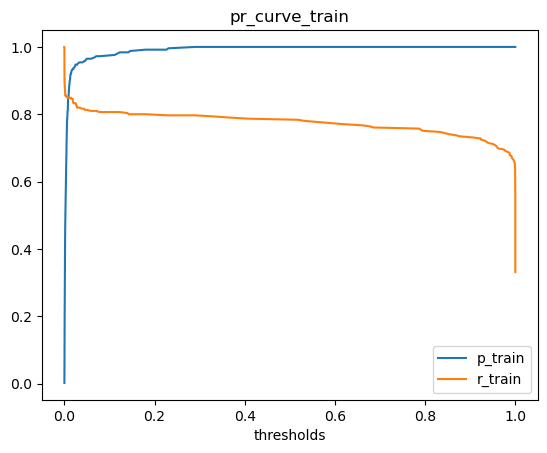

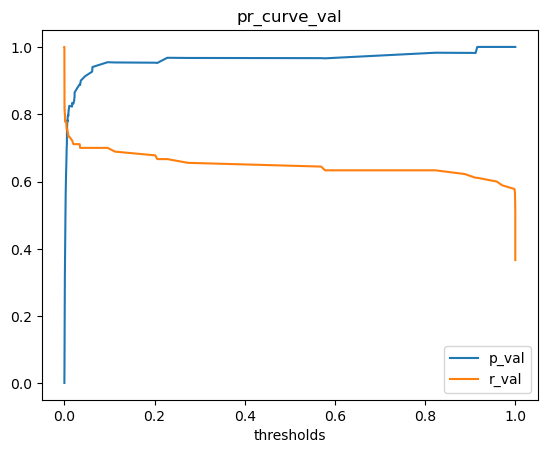

LogisticRegression(random_state=42):::
 train

 [[302   3]
 [ 32 273]]

               precision    recall  f1-score   support

           0       0.90      0.99      0.95       305
           1       0.99      0.90      0.94       305

    accuracy                           0.94       610
   macro avg       0.95      0.94      0.94       610
weighted avg       0.95      0.94      0.94       610
 
::::::
     val

 [[55571  1299]
 [    7    83]]

               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56870
           1       0.06      0.92      0.11        90

    accuracy                           0.98     56960
   macro avg       0.53      0.95      0.55     56960
weighted avg       1.00      0.98      0.99     56960
 
pr_auc_train= 0.9871928074732796
pr_auc_val= 0.48607314334703755


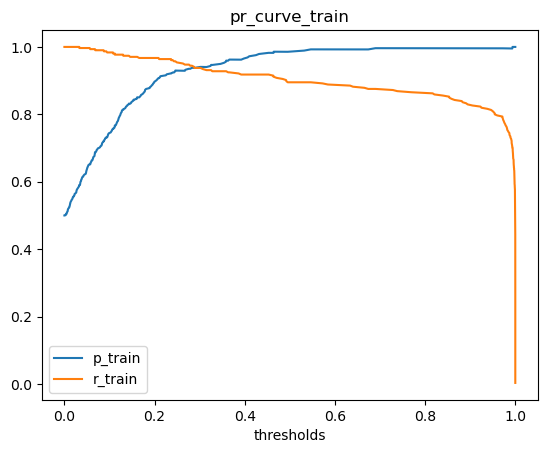

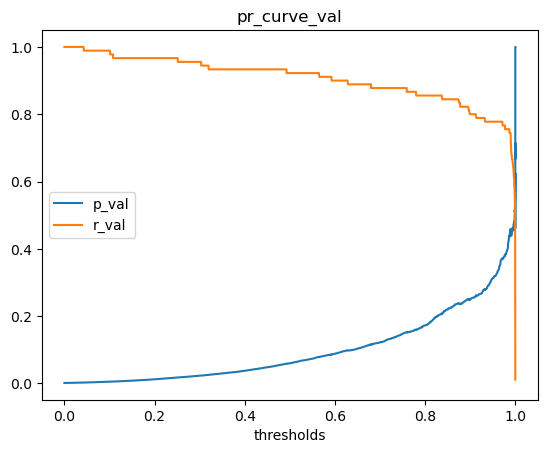

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42):::
 train

 [[304   1]
 [  5 300]]

               precision    recall  f1-score   support

           0       0.98      1.00      0.99       305
           1       1.00      0.98      0.99       305

    accuracy                           0.99       610
   macro avg       0.99      0.99      0.99       610
weighted avg       0.99      0.99      0.99       610
 
::::::
     val

 [[53801  3069]
 [   11    79]]

               precision    recall  f1-score   support

           0       1.00      0.95      0.97     56870
           1       0.03      0.88      0.05        90

    accuracy                           0.95     56960
   macro avg       0.51      0.91      0.51     56960
weighted avg       1.00      0.95      0.97     56960
 
pr_auc_train= 0.9998145024245545
pr_auc_val= 0.11622686820784205


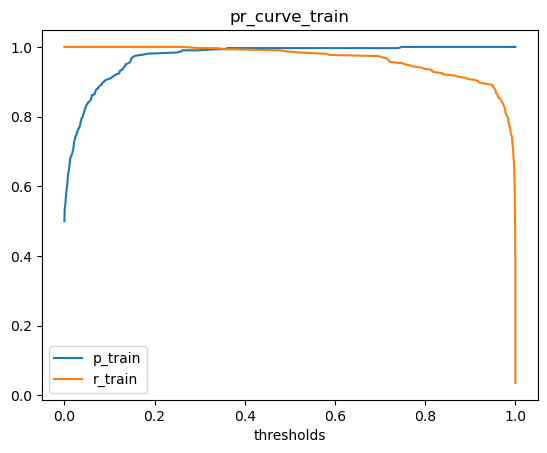

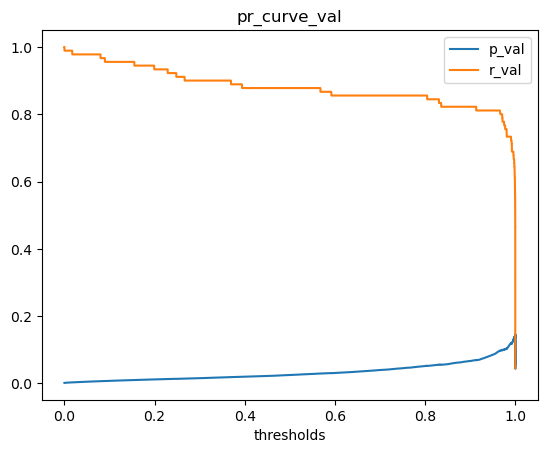

LogisticRegression(random_state=42):::
 train

 [[605   5]
 [ 36 269]]

               precision    recall  f1-score   support

           0       0.94      0.99      0.97       610
           1       0.98      0.88      0.93       305

    accuracy                           0.96       915
   macro avg       0.96      0.94      0.95       915
weighted avg       0.96      0.96      0.95       915
 
::::::
     val

 [[56099   771]
 [    8    82]]

               precision    recall  f1-score   support

           0       1.00      0.99      0.99     56870
           1       0.10      0.91      0.17        90

    accuracy                           0.99     56960
   macro avg       0.55      0.95      0.58     56960
weighted avg       1.00      0.99      0.99     56960
 
pr_auc_train= 0.9791045379265805
pr_auc_val= 0.5301002679649505


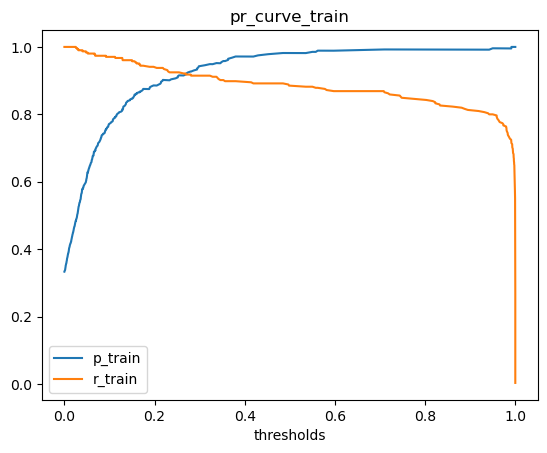

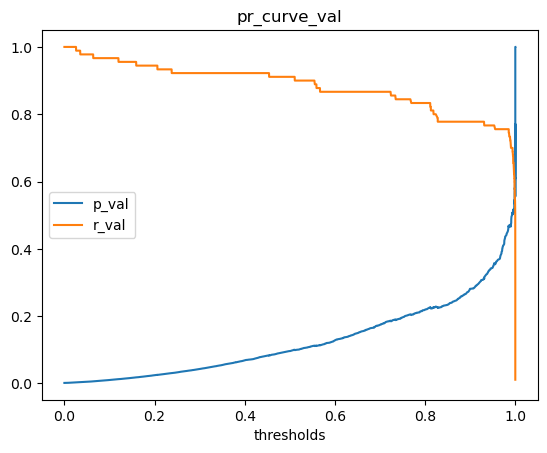

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42):::
 train

 [[609   1]
 [  8 297]]

               precision    recall  f1-score   support

           0       0.99      1.00      0.99       610
           1       1.00      0.97      0.99       305

    accuracy                           0.99       915
   macro avg       0.99      0.99      0.99       915
weighted avg       0.99      0.99      0.99       915
 
::::::
     val

 [[54915  1955]
 [   13    77]]

               precision    recall  f1-score   support

           0       1.00      0.97      0.98     56870
           1       0.04      0.86      0.07        90

    accuracy                           0.97     56960
   macro avg       0.52      0.91      0.53     56960
weighted avg       1.00      0.97      0.98     56960
 
pr_auc_train= 0.9997345171472051
pr_auc_val= 0.13203059478554618


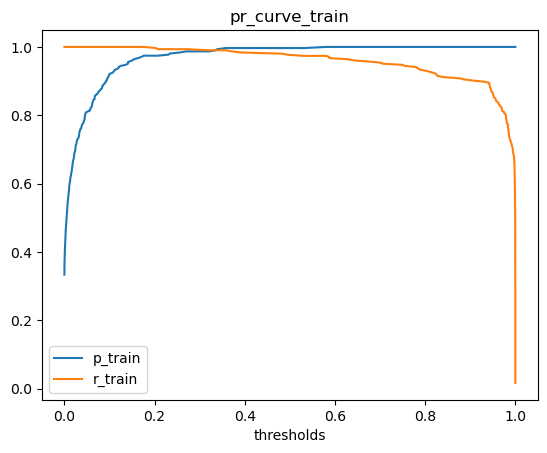

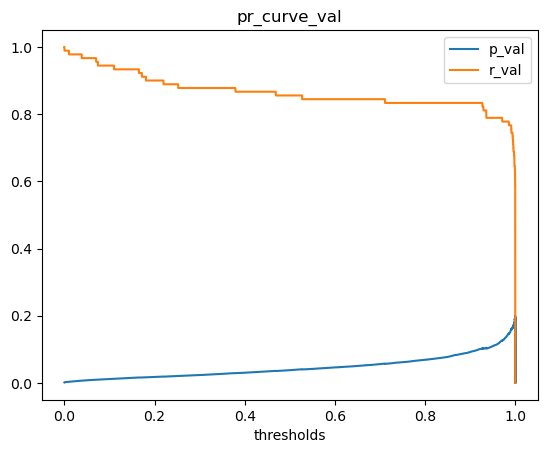

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42):::
 train

 [[166008   4571]
 [ 14640 155939]]

               precision    recall  f1-score   support

           0       0.92      0.97      0.95    170579
           1       0.97      0.91      0.94    170579

    accuracy                           0.94    341158
   macro avg       0.95      0.94      0.94    341158
weighted avg       0.95      0.94      0.94    341158
 
::::::
     val

 [[55424  1446]
 [   10    80]]

               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56870
           1       0.05      0.89      0.10        90

    accuracy                           0.97     56960
   macro avg       0.53      0.93      0.54     56960
weighted avg       1.00      0.97      0.99     56960
 
pr_auc_train= 0.9898566852694075
pr_auc_val= 0.7568835160683064


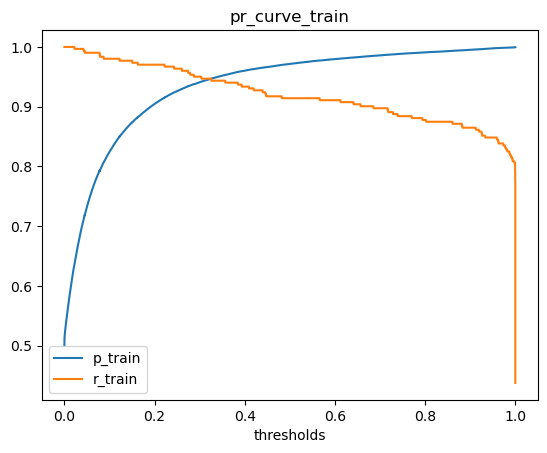

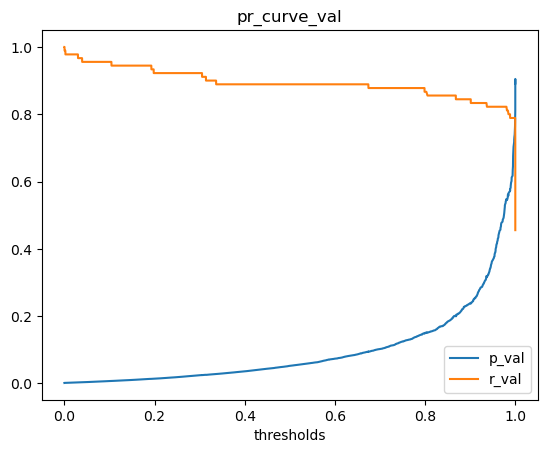

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42):::
 train

 [[169420   1159]
 [     0 170579]]

               precision    recall  f1-score   support

           0       1.00      0.99      1.00    170579
           1       0.99      1.00      1.00    170579

    accuracy                           1.00    341158
   macro avg       1.00      1.00      1.00    341158
weighted avg       1.00      1.00      1.00    341158
 
::::::
     val

 [[56459   411]
 [   20    70]]

               precision    recall  f1-score   support

           0       1.00      0.99      1.00     56870
           1       0.15      0.78      0.25        90

    accuracy                           0.99     56960
   macro avg       0.57      0.89      0.62     56960
weighted avg       1.00      0.99      1.00     56960
 
pr_auc_train= 0.9995552946100494
pr_auc_val= 0.7074395731410491


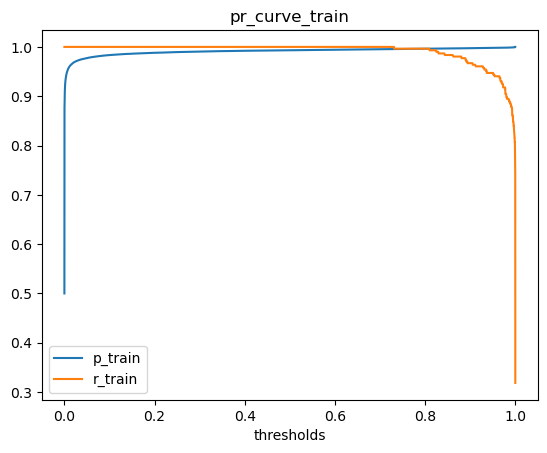

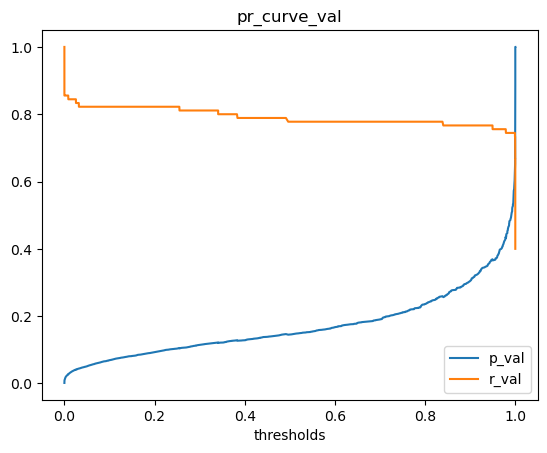

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42):::
 train

 [[168442   2137]
 [  8687  76603]]

               precision    recall  f1-score   support

           0       0.95      0.99      0.97    170579
           1       0.97      0.90      0.93     85290

    accuracy                           0.96    255869
   macro avg       0.96      0.94      0.95    255869
weighted avg       0.96      0.96      0.96    255869
 
::::::
     val

 [[56170   700]
 [   11    79]]

               precision    recall  f1-score   support

           0       1.00      0.99      0.99     56870
           1       0.10      0.88      0.18        90

    accuracy                           0.99     56960
   macro avg       0.55      0.93      0.59     56960
weighted avg       1.00      0.99      0.99     56960
 
pr_auc_train= 0.9819876841058579
pr_auc_val= 0.7427849114422315


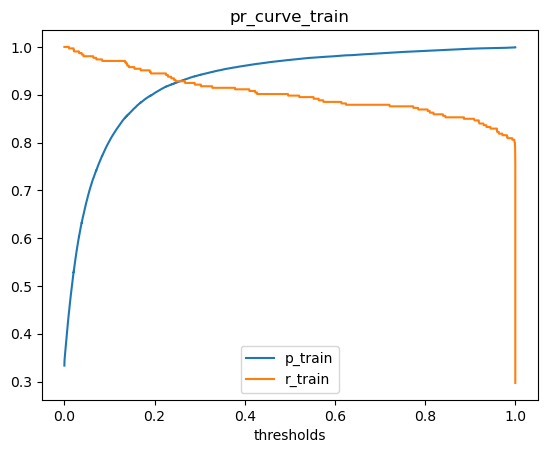

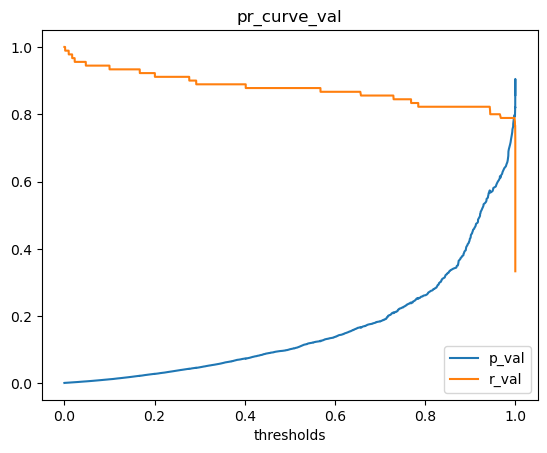

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42):::
 train

 [[169742    837]
 [     0  85290]]

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    170579
           1       0.99      1.00      1.00     85290

    accuracy                           1.00    255869
   macro avg       1.00      1.00      1.00    255869
weighted avg       1.00      1.00      1.00    255869
 
::::::
     val

 [[56540   330]
 [   21    69]]

               precision    recall  f1-score   support

           0       1.00      0.99      1.00     56870
           1       0.17      0.77      0.28        90

    accuracy                           0.99     56960
   macro avg       0.59      0.88      0.64     56960
weighted avg       1.00      0.99      1.00     56960
 
pr_auc_train= 0.9993630120158357
pr_auc_val= 0.7245359094717498


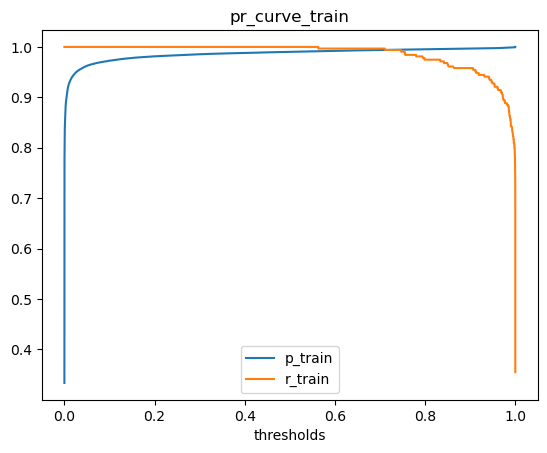

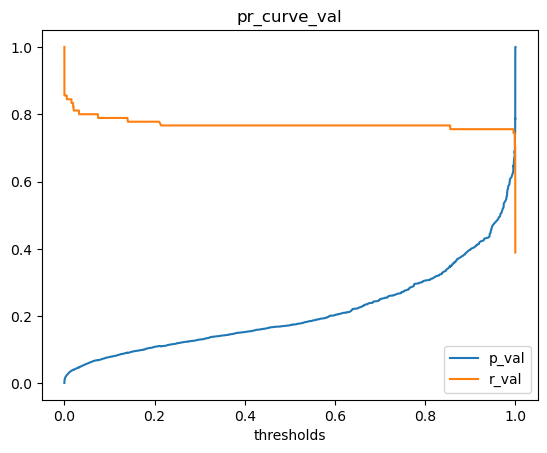

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42):::
 train

 [[169048   1531]
 [  5833 164746]]

               precision    recall  f1-score   support

           0       0.97      0.99      0.98    170579
           1       0.99      0.97      0.98    170579

    accuracy                           0.98    341158
   macro avg       0.98      0.98      0.98    341158
weighted avg       0.98      0.98      0.98    341158
 
::::::
     val

 [[56365   505]
 [   12    78]]

               precision    recall  f1-score   support

           0       1.00      0.99      1.00     56870
           1       0.13      0.87      0.23        90

    accuracy                           0.99     56960
   macro avg       0.57      0.93      0.61     56960
weighted avg       1.00      0.99      0.99     56960
 
pr_auc_train= 0.9978854825598948
pr_auc_val= 0.7652856889763248


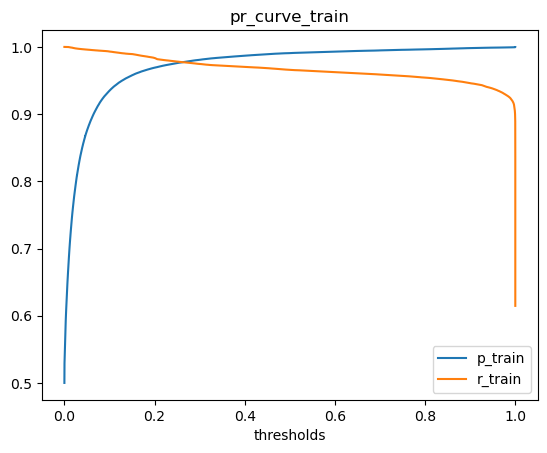

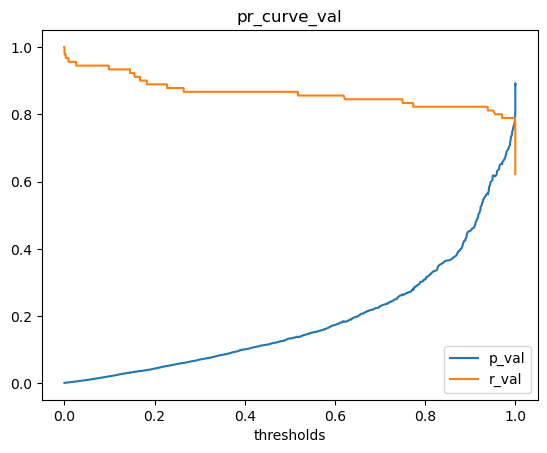

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42):::
 train

 [[170037    542]
 [   281 170298]]

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    170579
           1       1.00      1.00      1.00    170579

    accuracy                           1.00    341158
   macro avg       1.00      1.00      1.00    341158
weighted avg       1.00      1.00      1.00    341158
 
::::::
     val

 [[56670   200]
 [   19    71]]

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56870
           1       0.26      0.79      0.39        90

    accuracy                           1.00     56960
   macro avg       0.63      0.89      0.70     56960
weighted avg       1.00      1.00      1.00     56960
 
pr_auc_train= 0.999898649444452
pr_auc_val= 0.7380357870131153


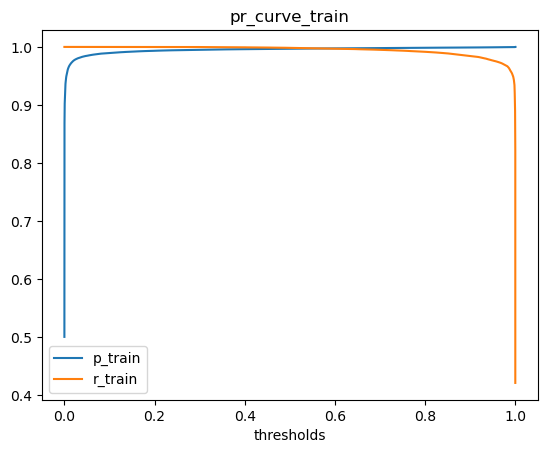

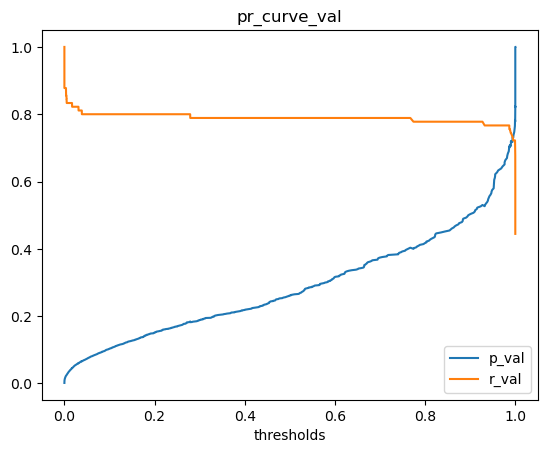

In [12]:
history_lg={}

history_lg[1]=lr_model(df_train,df_val,degree=1,over_or_under="none",under_res_factor=1,over_res_factor=1,cw=None)
history_lg[2]=lr_model(df_train,df_val,degree=2,over_or_under="none",under_res_factor=1,over_res_factor=1,cw=None)
history_lg[3]=lr_model(df_train,df_val,degree=1,over_or_under="none",under_res_factor=1,over_res_factor=1,cw={0:1,1:.06})
history_lg[4]=lr_model(df_train,df_val,degree=2,over_or_under="none",under_res_factor=1,over_res_factor=1,cw={0:1,1:.06})

history_lg[5]=lr_model(df_train,df_val,degree=1,over_or_under="under",under_res_factor=1,over_res_factor=1,cw=None)
history_lg[6]=lr_model(df_train,df_val,degree=2,over_or_under="under",under_res_factor=1,over_res_factor=1,cw=None)
history_lg[7]=lr_model(df_train,df_val,degree=1,over_or_under="under",under_res_factor=2,over_res_factor=1,cw=None)
history_lg[8]=lr_model(df_train,df_val,degree=2,over_or_under="under",under_res_factor=2,over_res_factor=1,cw=None)

history_lg[9]=lr_model(df_train,df_val,degree=1,over_or_under="over",under_res_factor=2,over_res_factor=1,cw=None)
history_lg[10]=lr_model(df_train,df_val,degree=2,over_or_under="over",under_res_factor=2,over_res_factor=1,cw=None)
history_lg[11]=lr_model(df_train,df_val,degree=1,over_or_under="over",under_res_factor=2,over_res_factor=0.5,cw=None)
history_lg[12]=lr_model(df_train,df_val,degree=2,over_or_under="over",under_res_factor=2,over_res_factor=0.5,cw=None)

history_lg[13]=lr_model(df_train,df_val,degree=1,over_or_under="smote",under_res_factor=2,over_res_factor=0.5,cw=None)
history_lg[14]=lr_model(df_train,df_val,degree=2,over_or_under="smote",under_res_factor=2,over_res_factor=0.5,cw=None)







In [13]:
history_lg

{1: {'model': LogisticRegression(random_state=42),
  'pipeline_pre': Pipeline(steps=[('scaler', StandardScaler()),
                  ('poly', PolynomialFeatures(degree=1))]),
  'over_or_under': 'none',
  'degree': 1,
  'under_res_factor': 1,
  'over_res_factor': 1,
  'class_weight': None,
  'pca_or_not': 'not',
  'n_pca': 7,
  'pr_auc_train': 0.7841060415182637,
  'pr_auc_val': 0.766014920274573,
  'f1_train_postive': 0.7706766917293234,
  'f1_val_postive': 0.7532467532467533,
  'f1_macro_avg_train_postive': 0.8851595839520852,
  'f1_macro_avg_val_postive': 0.8764563671477864},
 2: {'model': LogisticRegression(random_state=42),
  'pipeline_pre': Pipeline(steps=[('scaler', StandardScaler()), ('poly', PolynomialFeatures())]),
  'over_or_under': 'none',
  'degree': 2,
  'under_res_factor': 1,
  'over_res_factor': 1,
  'class_weight': None,
  'pca_or_not': 'not',
  'n_pca': 7,
  'pr_auc_train': 0.9136782983480983,
  'pr_auc_val': 0.7680461901208879,
  'f1_train_postive': 0.9090909090909091

In [14]:
history_lg

for k,v in history_lg.items(): 
    print(k,v["f1_train_postive"],v["f1_val_postive"],v["f1_macro_avg_train_postive"],v["f1_macro_avg_val_postive"])

1 0.7706766917293234 0.7532467532467533 0.8851595839520852 0.8764563671477864
2 0.9090909090909091 0.8101265822784811 0.954469252010841 0.9049314369172684
3 0.49631449631449637 0.46280991735537197 0.7478569795266782 0.7311193674158999
4 0.8786764705882353 0.7733333333333334 0.9392415246289827 0.8865172423896165
5 0.9397590361445783 0.1127717391304348 0.9424929766012407 0.5505787409368735
6 0.99009900990099 0.04879555281037677 0.990163511465153 0.510484041561221
7 0.9291882556131261 0.17391304347826084 0.9482072373189532 0.5835089173594779
8 0.9850746268656717 0.07257304429783223 0.9888698317702442 0.527484933569514
9 0.9419763266070452 0.09900990099009901 0.9436397533008747 0.5430225455940665
10 0.9966142493653544 0.24518388791593695 0.9966027079049808 0.620690736183749
11 0.9340120709626288 0.18181818181818182 0.9514412512370636 0.5877644924535266
12 0.9951171704090025 0.2822085889570552 0.9963288638531889 0.6395570983857488
13 0.9781390267651459 0.23179791976225858 0.9784112606181429

# RandomForestClassifier model with & without resampling 

In [15]:
def rf_model(df_train,df_val,degree=1,over_or_under="none",under_res_factor=1,over_res_factor=1,max_depth=3,n_estimators=6,pca_or_not="not",n_pca=7): 
    
    
    x_train,y_train,x_val,y_val,pipeline_pre=data_prepare (df_train,df_val,degree=degree,over_or_under=over_or_under,under_res_factor=under_res_factor,over_res_factor=over_res_factor,pca_or_not=pca_or_not,n_pca=n_pca)

    model, x_train,y_train,y_train_predict_prop,y_train_predict,x_val,y_val,y_val_predict_prop,y_val_predict,f1_train_postive,f1_val_postive,f1_macro_avg_train_postive,f1_macro_avg_val_postive=train_val_models(RandomForestClassifier(max_depth=max_depth,n_estimators=n_estimators,random_state=42),x_train,y_train,x_val,y_val)

    pt,rt,tht,pv,rv,thv,pr_auc_train,pr_auc_val=pr_curve(y_train,y_train_predict_prop,y_val,y_val_predict_prop)

    hist_rf={"model":model,
            "pipeline_pre":pipeline_pre,
             "over_or_under":over_or_under,
             "degree":degree ,
             "under_res_factor":under_res_factor, 
             "over_res_factor":over_res_factor,
             "max_depth":max_depth,
             "n_estimators":n_estimators,
             "pca_or_not":pca_or_not, 
             "n_pca":n_pca, 
            "pr_auc_train":pr_auc_train, 
            "pr_auc_val":pr_auc_val, 
            "f1_train_postive":f1_train_postive, 
            "f1_val_postive":f1_val_postive, 
            "f1_macro_avg_train_postive":f1_macro_avg_train_postive, 
            "f1_macro_avg_val_postive":f1_macro_avg_val_postive}
    
    return hist_rf
    

RandomForestClassifier(max_depth=3, n_estimators=6, random_state=42):::
 train

 [[170553     26]
 [   101    204]]

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    170579
           1       0.89      0.67      0.76       305

    accuracy                           1.00    170884
   macro avg       0.94      0.83      0.88    170884
weighted avg       1.00      1.00      1.00    170884
 
::::::
     val

 [[56860    10]
 [   26    64]]

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56870
           1       0.86      0.71      0.78        90

    accuracy                           1.00     56960
   macro avg       0.93      0.86      0.89     56960
weighted avg       1.00      1.00      1.00     56960
 
pr_auc_train= 0.7725047031842988
pr_auc_val= 0.7805368885562927


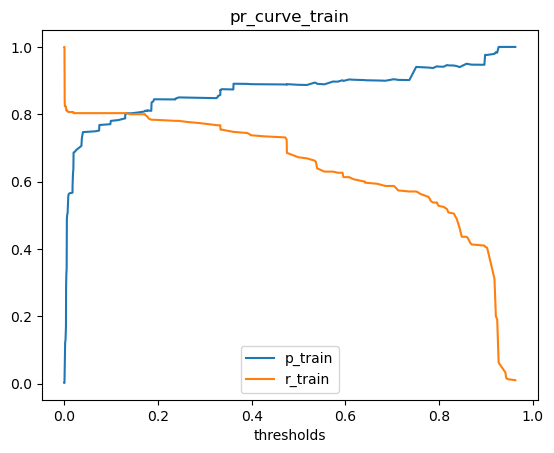

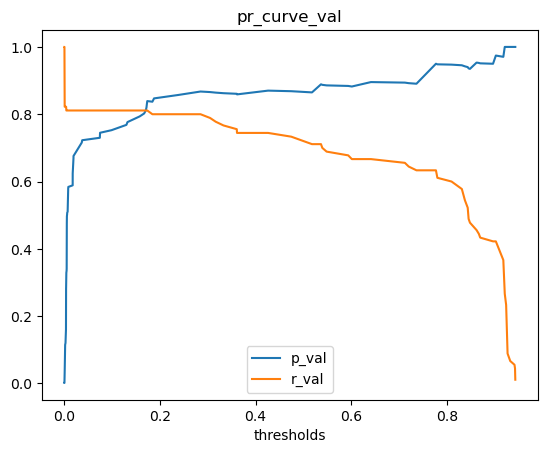

RandomForestClassifier(max_depth=6, n_estimators=10, random_state=42):::
 train

 [[170577      2]
 [    64    241]]

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    170579
           1       0.99      0.79      0.88       305

    accuracy                           1.00    170884
   macro avg       1.00      0.90      0.94    170884
weighted avg       1.00      1.00      1.00    170884
 
::::::
     val

 [[56865     5]
 [   23    67]]

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56870
           1       0.93      0.74      0.83        90

    accuracy                           1.00     56960
   macro avg       0.97      0.87      0.91     56960
weighted avg       1.00      1.00      1.00     56960
 
pr_auc_train= 0.855868365459014
pr_auc_val= 0.8525097004158947


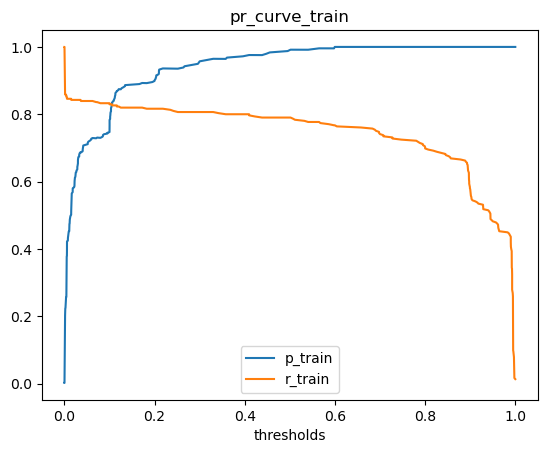

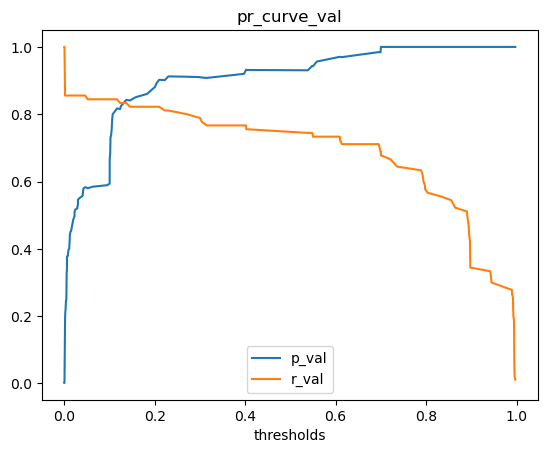

RandomForestClassifier(max_depth=10, n_estimators=20, random_state=42):::
 train

 [[170577      2]
 [    51    254]]

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    170579
           1       0.99      0.83      0.91       305

    accuracy                           1.00    170884
   macro avg       1.00      0.92      0.95    170884
weighted avg       1.00      1.00      1.00    170884
 
::::::
     val

 [[56868     2]
 [   18    72]]

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56870
           1       0.97      0.80      0.88        90

    accuracy                           1.00     56960
   macro avg       0.99      0.90      0.94     56960
weighted avg       1.00      1.00      1.00     56960
 
pr_auc_train= 0.936722628475618
pr_auc_val= 0.857669120558661


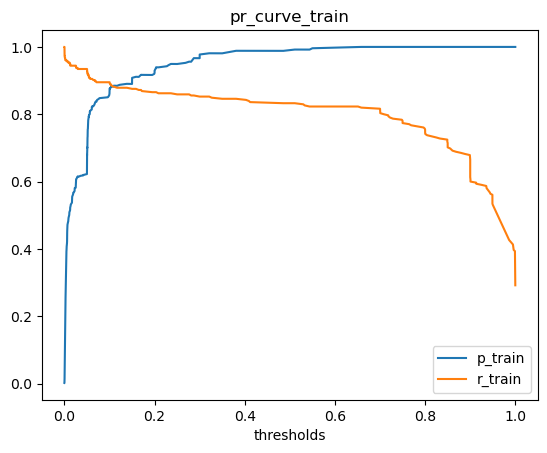

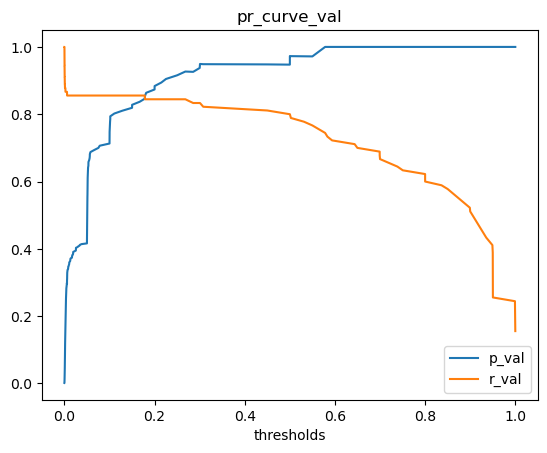

RandomForestClassifier(max_depth=20, n_estimators=20, random_state=42):::
 train

 [[170578      1]
 [    29    276]]

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    170579
           1       1.00      0.90      0.95       305

    accuracy                           1.00    170884
   macro avg       1.00      0.95      0.97    170884
weighted avg       1.00      1.00      1.00    170884
 
::::::
     val

 [[56867     3]
 [   23    67]]

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56870
           1       0.96      0.74      0.84        90

    accuracy                           1.00     56960
   macro avg       0.98      0.87      0.92     56960
weighted avg       1.00      1.00      1.00     56960
 
pr_auc_train= 0.9955746020324308
pr_auc_val= 0.8536278387006523


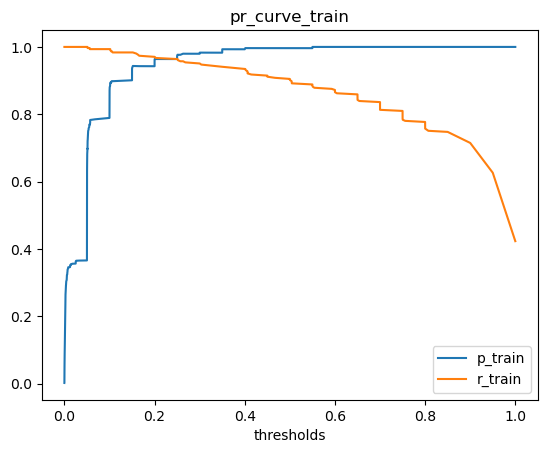

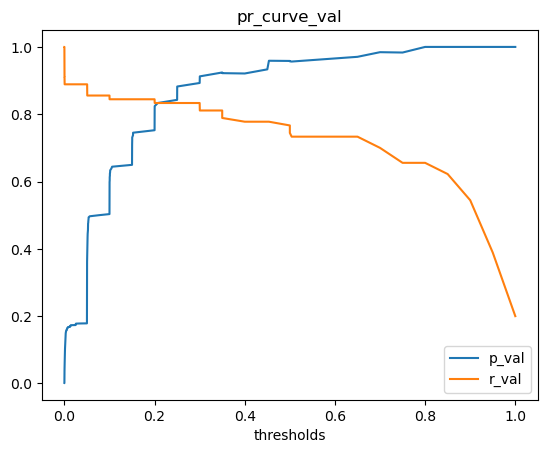

RandomForestClassifier(max_depth=3, n_estimators=6, random_state=42):::
 train

 [[304   1]
 [ 36 269]]

               precision    recall  f1-score   support

           0       0.89      1.00      0.94       305
           1       1.00      0.88      0.94       305

    accuracy                           0.94       610
   macro avg       0.95      0.94      0.94       610
weighted avg       0.95      0.94      0.94       610
 
::::::
     val

 [[56126   744]
 [   12    78]]

               precision    recall  f1-score   support

           0       1.00      0.99      0.99     56870
           1       0.09      0.87      0.17        90

    accuracy                           0.99     56960
   macro avg       0.55      0.93      0.58     56960
weighted avg       1.00      0.99      0.99     56960
 
pr_auc_train= 0.9829716498496415
pr_auc_val= 0.7682107541418142


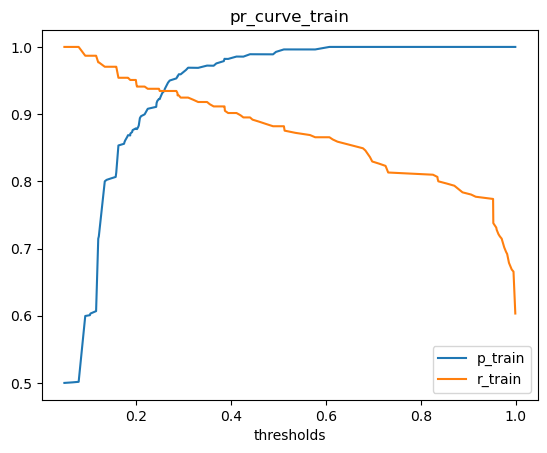

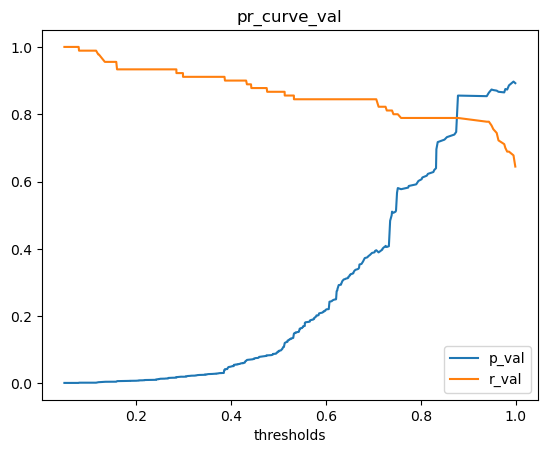

RandomForestClassifier(max_depth=6, n_estimators=10, random_state=42):::
 train

 [[304   1]
 [ 17 288]]

               precision    recall  f1-score   support

           0       0.95      1.00      0.97       305
           1       1.00      0.94      0.97       305

    accuracy                           0.97       610
   macro avg       0.97      0.97      0.97       610
weighted avg       0.97      0.97      0.97       610
 
::::::
     val

 [[54625  2245]
 [    6    84]]

               precision    recall  f1-score   support

           0       1.00      0.96      0.98     56870
           1       0.04      0.93      0.07        90

    accuracy                           0.96     56960
   macro avg       0.52      0.95      0.52     56960
weighted avg       1.00      0.96      0.98     56960
 
pr_auc_train= 0.9982905696830671
pr_auc_val= 0.6025002602488124


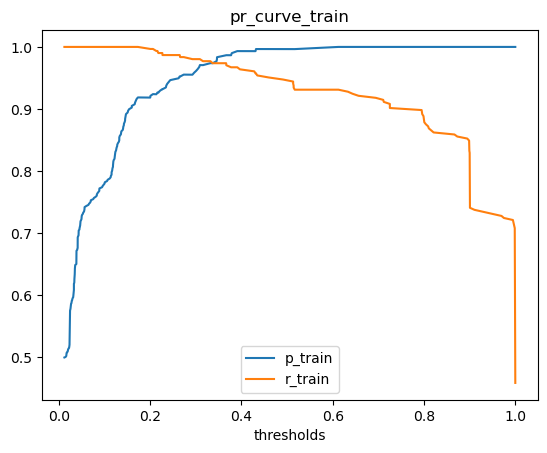

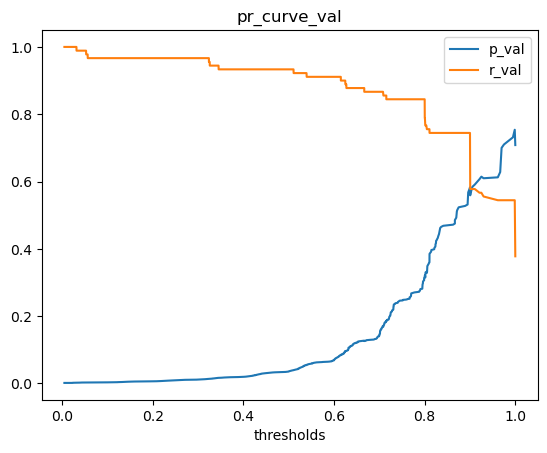

RandomForestClassifier(max_depth=10, n_estimators=20, random_state=42):::
 train

 [[610   0]
 [  8 297]]

               precision    recall  f1-score   support

           0       0.99      1.00      0.99       610
           1       1.00      0.97      0.99       305

    accuracy                           0.99       915
   macro avg       0.99      0.99      0.99       915
weighted avg       0.99      0.99      0.99       915
 
::::::
     val

 [[56447   423]
 [   10    80]]

               precision    recall  f1-score   support

           0       1.00      0.99      1.00     56870
           1       0.16      0.89      0.27        90

    accuracy                           0.99     56960
   macro avg       0.58      0.94      0.63     56960
weighted avg       1.00      0.99      1.00     56960
 
pr_auc_train= 0.999935606139554
pr_auc_val= 0.7931333547811651


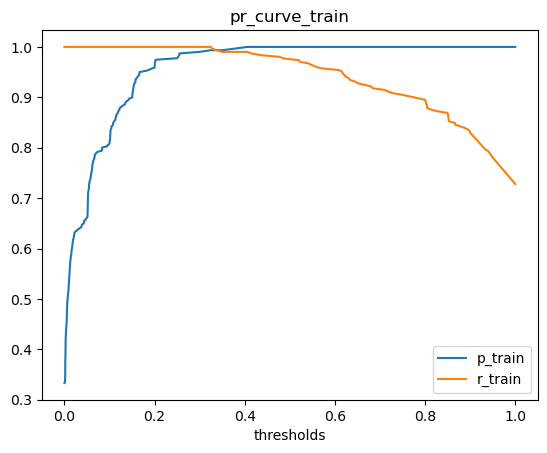

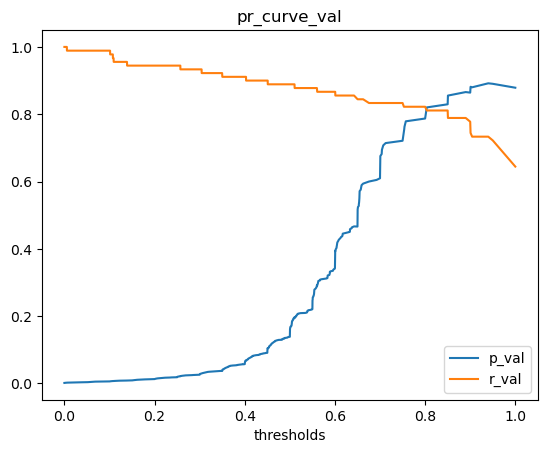

RandomForestClassifier(max_depth=20, n_estimators=20, random_state=42):::
 train

 [[610   0]
 [  2 303]]

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       610
           1       1.00      0.99      1.00       305

    accuracy                           1.00       915
   macro avg       1.00      1.00      1.00       915
weighted avg       1.00      1.00      1.00       915
 
::::::
     val

 [[56281   589]
 [    8    82]]

               precision    recall  f1-score   support

           0       1.00      0.99      0.99     56870
           1       0.12      0.91      0.22        90

    accuracy                           0.99     56960
   macro avg       0.56      0.95      0.61     56960
weighted avg       1.00      0.99      0.99     56960
 
pr_auc_train= 1.0
pr_auc_val= 0.750083071589146


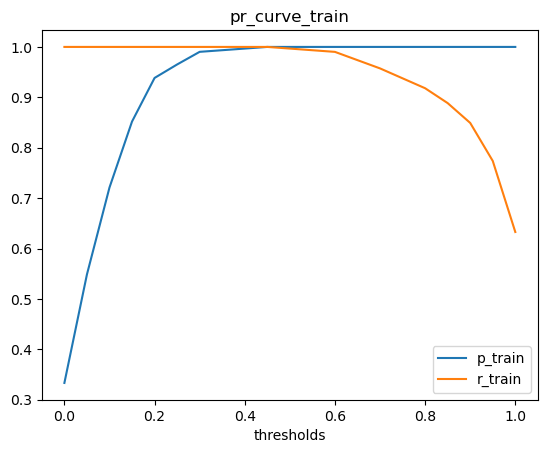

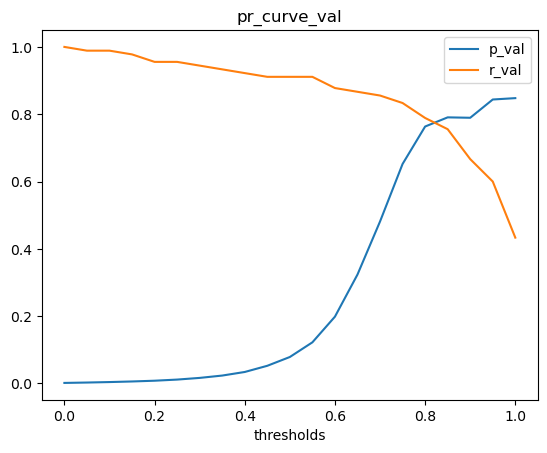

RandomForestClassifier(max_depth=3, n_estimators=6, random_state=42):::
 train

 [[167762   2817]
 [ 19709 150870]]

               precision    recall  f1-score   support

           0       0.89      0.98      0.94    170579
           1       0.98      0.88      0.93    170579

    accuracy                           0.93    341158
   macro avg       0.94      0.93      0.93    341158
weighted avg       0.94      0.93      0.93    341158
 
::::::
     val

 [[55999   871]
 [   12    78]]

               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56870
           1       0.08      0.87      0.15        90

    accuracy                           0.98     56960
   macro avg       0.54      0.93      0.57     56960
weighted avg       1.00      0.98      0.99     56960
 
pr_auc_train= 0.9848928961147952
pr_auc_val= 0.7523395967196269


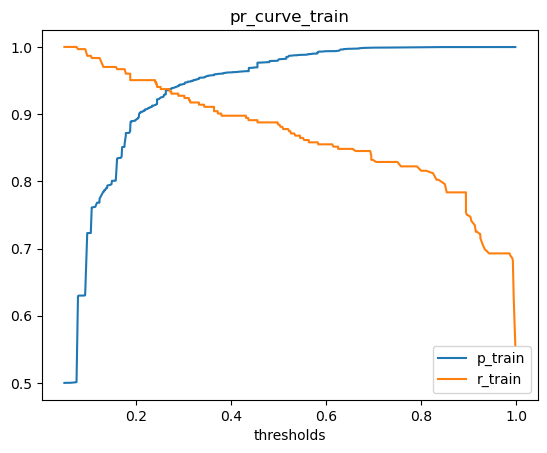

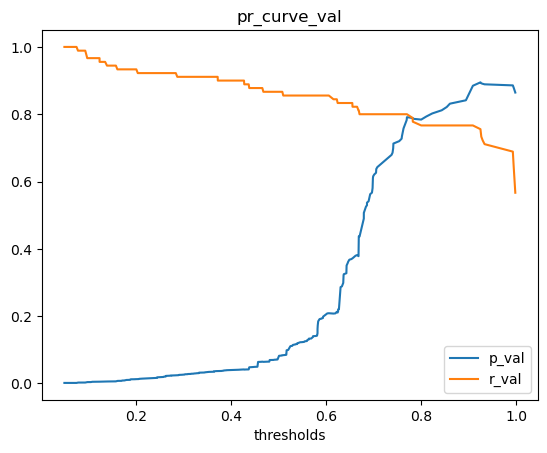

RandomForestClassifier(max_depth=6, n_estimators=7, random_state=42):::
 train

 [[170126    453]
 [  8989 161590]]

               precision    recall  f1-score   support

           0       0.95      1.00      0.97    170579
           1       1.00      0.95      0.97    170579

    accuracy                           0.97    341158
   macro avg       0.97      0.97      0.97    341158
weighted avg       0.97      0.97      0.97    341158
 
::::::
     val

 [[56735   135]
 [   13    77]]

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56870
           1       0.36      0.86      0.51        90

    accuracy                           1.00     56960
   macro avg       0.68      0.93      0.75     56960
weighted avg       1.00      1.00      1.00     56960
 
pr_auc_train= 0.9981025500036368
pr_auc_val= 0.7632660808245777


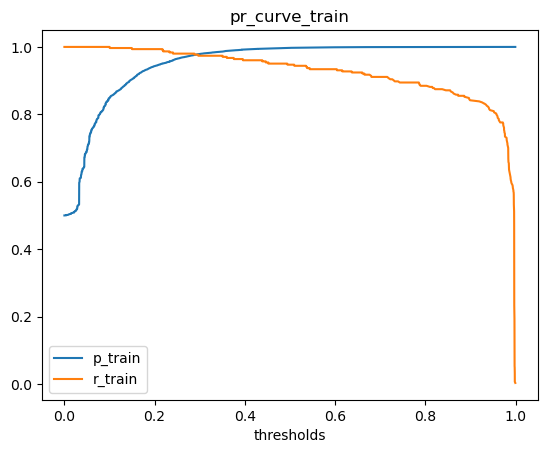

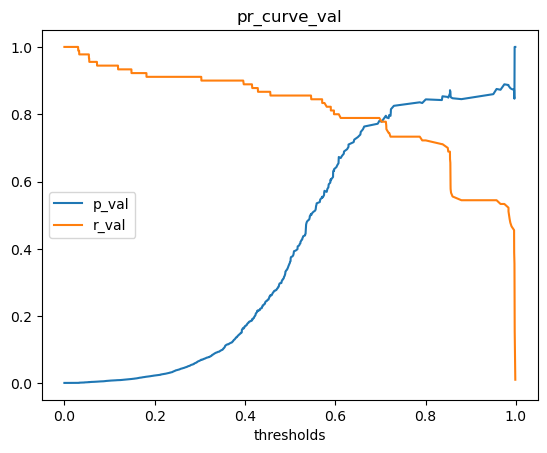

RandomForestClassifier(max_depth=10, n_estimators=10, random_state=42):::
 train

 [[170555     24]
 [  1362  83928]]

               precision    recall  f1-score   support

           0       0.99      1.00      1.00    170579
           1       1.00      0.98      0.99     85290

    accuracy                           0.99    255869
   macro avg       1.00      0.99      0.99    255869
weighted avg       0.99      0.99      0.99    255869
 
::::::
     val

 [[56861     9]
 [   20    70]]

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56870
           1       0.89      0.78      0.83        90

    accuracy                           1.00     56960
   macro avg       0.94      0.89      0.91     56960
weighted avg       1.00      1.00      1.00     56960
 
pr_auc_train= 0.9999190337750953
pr_auc_val= 0.8155996564718104


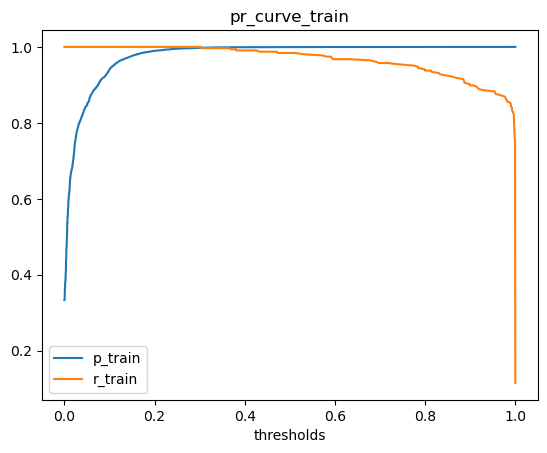

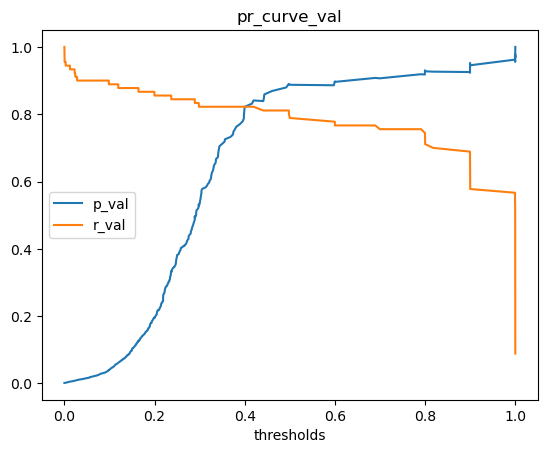

RandomForestClassifier(max_depth=30, n_estimators=20, random_state=42):::
 train

 [[170578      1]
 [     0  85290]]

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    170579
           1       1.00      1.00      1.00     85290

    accuracy                           1.00    255869
   macro avg       1.00      1.00      1.00    255869
weighted avg       1.00      1.00      1.00    255869
 
::::::
     val

 [[56867     3]
 [   31    59]]

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56870
           1       0.95      0.66      0.78        90

    accuracy                           1.00     56960
   macro avg       0.98      0.83      0.89     56960
weighted avg       1.00      1.00      1.00     56960
 
pr_auc_train= 1.0
pr_auc_val= 0.8346210582829472


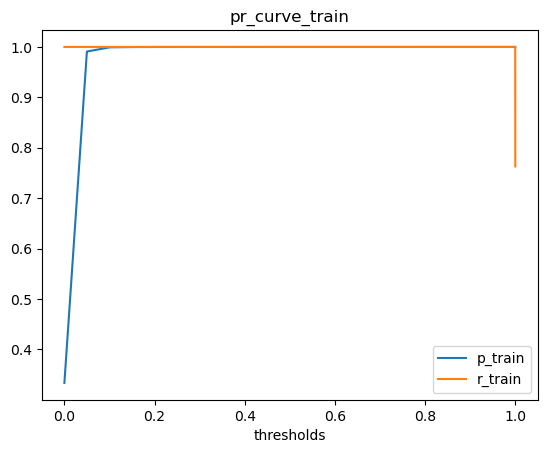

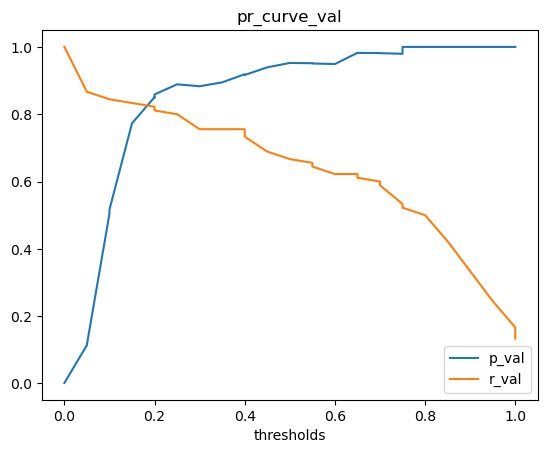

RandomForestClassifier(max_depth=3, n_estimators=6, random_state=42):::
 train

 [[168514   2065]
 [ 12995 157584]]

               precision    recall  f1-score   support

           0       0.93      0.99      0.96    170579
           1       0.99      0.92      0.95    170579

    accuracy                           0.96    341158
   macro avg       0.96      0.96      0.96    341158
weighted avg       0.96      0.96      0.96    341158
 
::::::
     val

 [[56169   701]
 [   13    77]]

               precision    recall  f1-score   support

           0       1.00      0.99      0.99     56870
           1       0.10      0.86      0.18        90

    accuracy                           0.99     56960
   macro avg       0.55      0.92      0.59     56960
weighted avg       1.00      0.99      0.99     56960
 
pr_auc_train= 0.9876079126282771
pr_auc_val= 0.7684258967171549


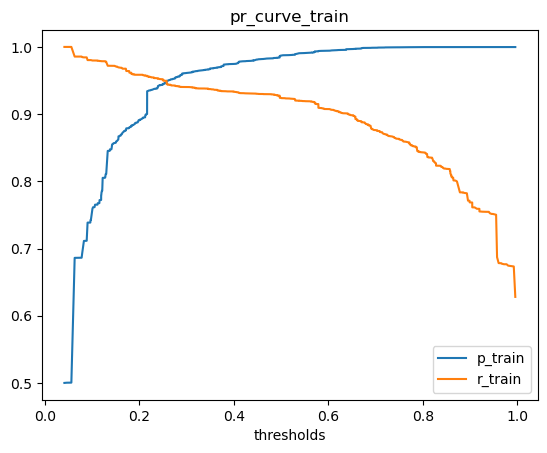

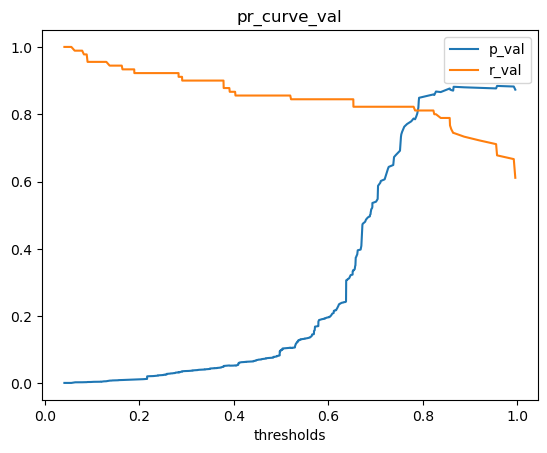

RandomForestClassifier(max_depth=15, n_estimators=20, random_state=42):::
 train

 [[170548     31]
 [     1 170578]]

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    170579
           1       1.00      1.00      1.00    170579

    accuracy                           1.00    341158
   macro avg       1.00      1.00      1.00    341158
weighted avg       1.00      1.00      1.00    341158
 
::::::
     val

 [[56858    12]
 [   18    72]]

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56870
           1       0.86      0.80      0.83        90

    accuracy                           1.00     56960
   macro avg       0.93      0.90      0.91     56960
weighted avg       1.00      1.00      1.00     56960
 
pr_auc_train= 0.9999997114842449
pr_auc_val= 0.8197073570195224


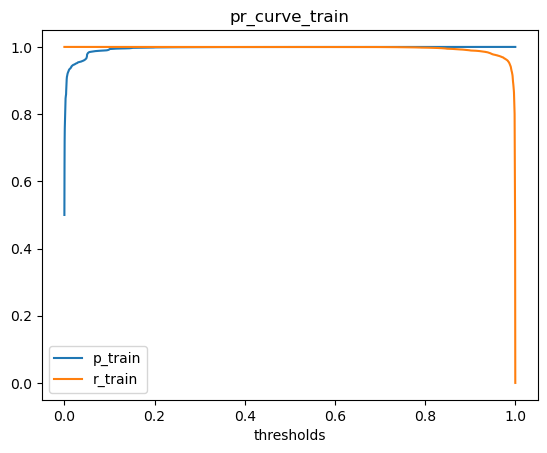

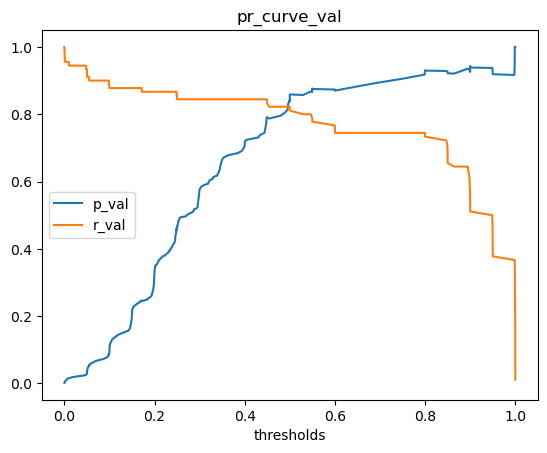

In [16]:
history_rf={}

history_rf[1]=rf_model(df_train,df_val,degree=1,over_or_under="none",under_res_factor=1,over_res_factor=1,max_depth=3,n_estimators=6)
history_rf[2]=rf_model(df_train,df_val,degree=2,over_or_under="none",under_res_factor=1,over_res_factor=1,max_depth=6,n_estimators=10)
history_rf[3]=rf_model(df_train,df_val,degree=1,over_or_under="none",under_res_factor=1,over_res_factor=1,max_depth=10,n_estimators=20)
history_rf[4]=rf_model(df_train,df_val,degree=2,over_or_under="none",under_res_factor=1,over_res_factor=1,max_depth=20,n_estimators=20)

history_rf[5]=rf_model(df_train,df_val,degree=1,over_or_under="under",under_res_factor=1,over_res_factor=1,max_depth=3,n_estimators=6)
history_rf[6]=rf_model(df_train,df_val,degree=2,over_or_under="under",under_res_factor=1,over_res_factor=1,max_depth=6,n_estimators=10)
history_rf[7]=rf_model(df_train,df_val,degree=1,over_or_under="under",under_res_factor=2,over_res_factor=1,max_depth=10,n_estimators=20)
history_rf[8]=rf_model(df_train,df_val,degree=2,over_or_under="under",under_res_factor=2,over_res_factor=1,max_depth=20,n_estimators=20)

history_rf[9]=rf_model(df_train,df_val,degree=1,over_or_under="over",under_res_factor=2,over_res_factor=1,max_depth=3,n_estimators=6)
history_rf[10]=rf_model(df_train,df_val,degree=2,over_or_under="over",under_res_factor=2,over_res_factor=1,max_depth=6,n_estimators=7)
history_rf[11]=rf_model(df_train,df_val,degree=1,over_or_under="over",under_res_factor=2,over_res_factor=0.5,max_depth=10,n_estimators=10)
history_rf[12]=rf_model(df_train,df_val,degree=2,over_or_under="over",under_res_factor=2,over_res_factor=0.5,max_depth=30,n_estimators=20)

history_rf[13]=rf_model(df_train,df_val,degree=1,over_or_under="smote",under_res_factor=2,over_res_factor=0.5,max_depth=3,n_estimators=6)
history_rf[14]=rf_model(df_train,df_val,degree=2,over_or_under="smote",under_res_factor=2,over_res_factor=0.5,max_depth=15,n_estimators=20)







In [17]:
history_rf

{1: {'model': RandomForestClassifier(max_depth=3, n_estimators=6, random_state=42),
  'pipeline_pre': Pipeline(steps=[('scaler', StandardScaler()),
                  ('poly', PolynomialFeatures(degree=1))]),
  'over_or_under': 'none',
  'degree': 1,
  'under_res_factor': 1,
  'over_res_factor': 1,
  'max_depth': 3,
  'n_estimators': 6,
  'pca_or_not': 'not',
  'n_pca': 7,
  'pr_auc_train': 0.7725047031842988,
  'pr_auc_val': 0.7805368885562927,
  'f1_train_postive': 0.7626168224299066,
  'f1_val_postive': 0.7804878048780488,
  'f1_macro_avg_train_postive': 0.8811223213584622,
  'f1_macro_avg_val_postive': 0.8900856690271604},
 2: {'model': RandomForestClassifier(max_depth=6, n_estimators=10, random_state=42),
  'pipeline_pre': Pipeline(steps=[('scaler', StandardScaler()), ('poly', PolynomialFeatures())]),
  'over_or_under': 'none',
  'degree': 2,
  'under_res_factor': 1,
  'over_res_factor': 1,
  'max_depth': 6,
  'n_estimators': 10,
  'pca_or_not': 'not',
  'n_pca': 7,
  'pr_auc_train

# SVC model with & without resampling 

In [18]:
def svc_model(df_train,df_val,degree=1,over_or_under="none",under_res_factor=1,over_res_factor=1,kernel='rbf',pca_or_not="not",n_pca=7): 
    
    
    x_train,y_train,x_val,y_val,pipeline_pre=data_prepare (df_train,df_val,degree=degree,over_or_under=over_or_under,under_res_factor=under_res_factor,over_res_factor=over_res_factor,pca_or_not=pca_or_not,n_pca=n_pca)

    model, x_train,y_train,y_train_predict_prop,y_train_predict,x_val,y_val,y_val_predict_prop,y_val_predict,f1_train_postive,f1_val_postive,f1_macro_avg_train_postive,f1_macro_avg_val_postive=train_val_models(SVC(kernel=kernel,probability=True,random_state=42),x_train,y_train,x_val,y_val)

    pt,rt,tht,pv,rv,thv,pr_auc_train,pr_auc_val=pr_curve(y_train,y_train_predict_prop,y_val,y_val_predict_prop)

    hist_svc={"model":model,
            "pipeline_pre":pipeline_pre,
             "over_or_under":over_or_under,
             "degree":degree ,
              "kernel":kernel,
             "pca_or_not":pca_or_not, 
             "n_pca":n_pca, 
             "under_res_factor":under_res_factor, 
             "over_res_factor":over_res_factor,
            "pr_auc_train":pr_auc_train, 
            "pr_auc_val":pr_auc_val, 
            "f1_train_postive":f1_train_postive, 
            "f1_val_postive":f1_val_postive, 
            "f1_macro_avg_train_postive":f1_macro_avg_train_postive, 
            "f1_macro_avg_val_postive":f1_macro_avg_val_postive}
    
    return hist_svc
    

SVC(probability=True, random_state=42):::
 train

 [[170576      3]
 [    57    248]]

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    170579
           1       0.99      0.81      0.89       305

    accuracy                           1.00    170884
   macro avg       0.99      0.91      0.95    170884
weighted avg       1.00      1.00      1.00    170884
 
::::::
     val

 [[56868     2]
 [   34    56]]

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56870
           1       0.97      0.62      0.76        90

    accuracy                           1.00     56960
   macro avg       0.98      0.81      0.88     56960
weighted avg       1.00      1.00      1.00     56960
 
pr_auc_train= 0.9786305321387029
pr_auc_val= 0.8395022061499835


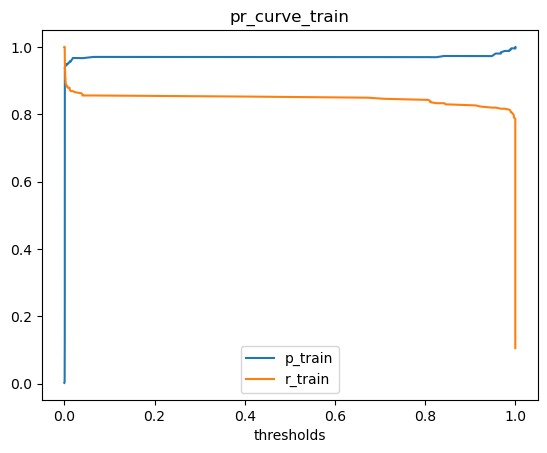

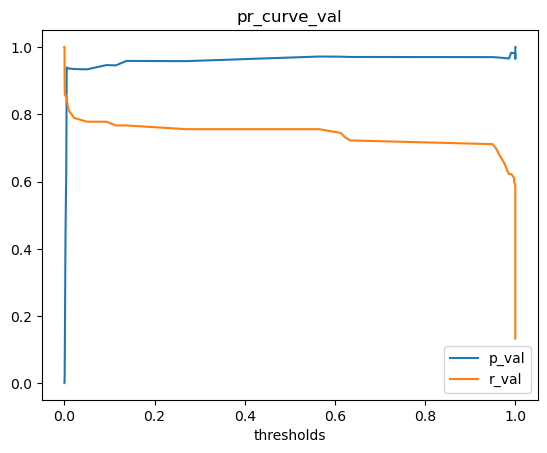

SVC(kernel='sigmoid', probability=True, random_state=42):::
 train

 [[170455    124]
 [   140    165]]

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    170579
           1       0.57      0.54      0.56       305

    accuracy                           1.00    170884
   macro avg       0.79      0.77      0.78    170884
weighted avg       1.00      1.00      1.00    170884
 
::::::
     val

 [[56829    41]
 [   41    49]]

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56870
           1       0.54      0.54      0.54        90

    accuracy                           1.00     56960
   macro avg       0.77      0.77      0.77     56960
weighted avg       1.00      1.00      1.00     56960
 
pr_auc_train= 0.4708448036123849
pr_auc_val= 0.43825581664705016


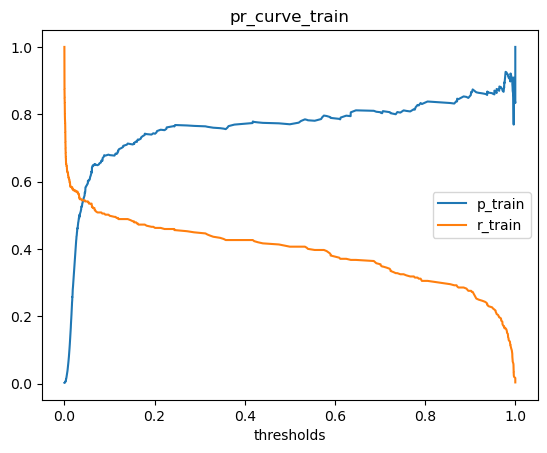

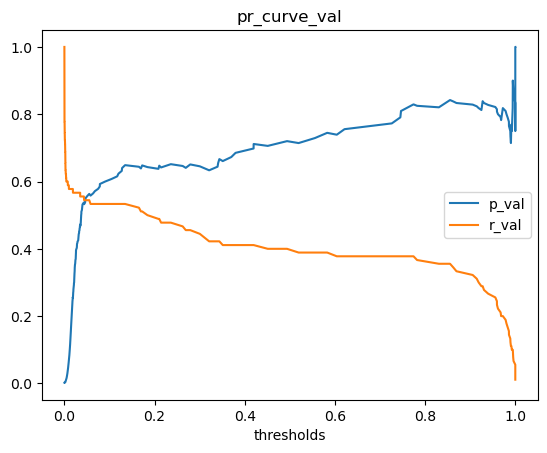

SVC(kernel='poly', probability=True, random_state=42):::
 train

 [[170579      0]
 [    42    263]]

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    170579
           1       1.00      0.86      0.93       305

    accuracy                           1.00    170884
   macro avg       1.00      0.93      0.96    170884
weighted avg       1.00      1.00      1.00    170884
 
::::::
     val

 [[56864     6]
 [   22    68]]

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56870
           1       0.92      0.76      0.83        90

    accuracy                           1.00     56960
   macro avg       0.96      0.88      0.91     56960
weighted avg       1.00      1.00      1.00     56960
 
pr_auc_train= 0.9568418170716139
pr_auc_val= 0.768823747525773


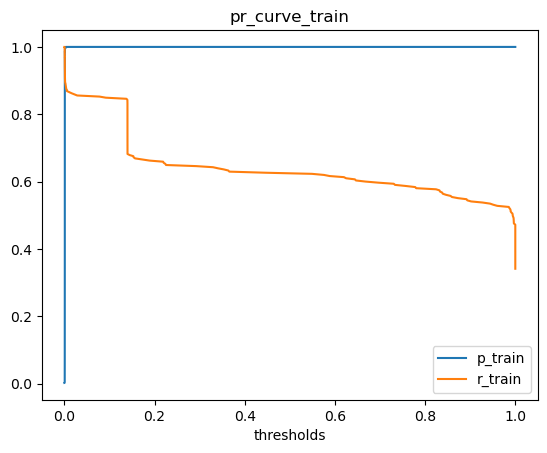

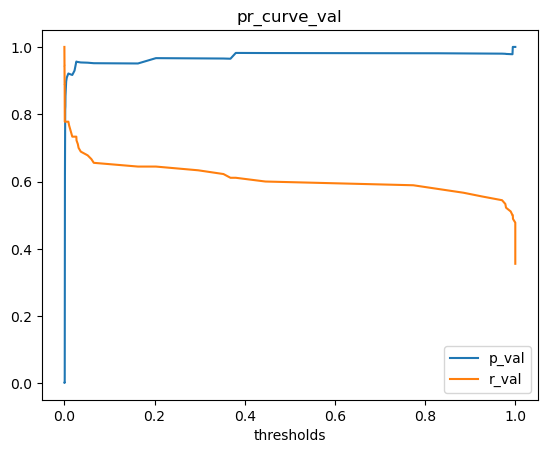

In [19]:
history_svc={}

history_svc[1]=svc_model(df_train,df_val,degree=1,over_or_under="none",under_res_factor=1,over_res_factor=1,kernel='rbf')
history_svc[2]=svc_model(df_train,df_val,degree=1,over_or_under="none",under_res_factor=1,over_res_factor=1,kernel="sigmoid")
history_svc[3]=svc_model(df_train,df_val,degree=1,over_or_under="none",under_res_factor=1,over_res_factor=1,kernel='poly')


# history_svc[5]=svc_model(df_train,df_val,degree=1,over_or_under="under",under_res_factor=1,over_res_factor=1,kernel='rbf')
# history_svc[6]=svc_model(df_train,df_val,degree=1,over_or_under="under",under_res_factor=1,over_res_factor=1,kernel="sigmoid")
# history_svc[7]=svc_model(df_train,df_val,degree=1,over_or_under="over",under_res_factor=1,over_res_factor=1,kernel="sigmoid")
# history_svc[8]=svc_model(df_train,df_val,degree=1,over_or_under="smote",under_res_factor=1,over_res_factor=1,kernel="sigmoid")

# history_svc[9]=svc_model(df_train,df_val,degree=1,over_or_under="none",under_res_factor=1,over_res_factor=1,kernel='poly')
# history_svc[10]=svc_model(df_train,df_val,degree=1,over_or_under="under",under_res_factor=1,over_res_factor=1,kernel='poly')
# history_svc[11]=svc_model(df_train,df_val,degree=1,over_or_under="over",under_res_factor=1,over_res_factor=1,kernel='poly')
# history_svc[12]=svc_model(df_train,df_val,degree=1,over_or_under="smote",under_res_factor=1,over_res_factor=1,kernel='poly')





In [20]:
history_svc

{1: {'model': SVC(probability=True, random_state=42),
  'pipeline_pre': Pipeline(steps=[('scaler', StandardScaler()),
                  ('poly', PolynomialFeatures(degree=1))]),
  'over_or_under': 'none',
  'degree': 1,
  'kernel': 'rbf',
  'pca_or_not': 'not',
  'n_pca': 7,
  'under_res_factor': 1,
  'over_res_factor': 1,
  'pr_auc_train': 0.9786305321387029,
  'pr_auc_val': 0.8395022061499835,
  'f1_train_postive': 0.8920863309352518,
  'f1_val_postive': 0.7567567567567567,
  'f1_macro_avg_train_postive': 0.9459552435891456,
  'f1_macro_avg_val_postive': 0.8782201672192179},
 2: {'model': SVC(kernel='sigmoid', probability=True, random_state=42),
  'pipeline_pre': Pipeline(steps=[('scaler', StandardScaler()),
                  ('poly', PolynomialFeatures(degree=1))]),
  'over_or_under': 'none',
  'degree': 1,
  'kernel': 'sigmoid',
  'pca_or_not': 'not',
  'n_pca': 7,
  'under_res_factor': 1,
  'over_res_factor': 1,
  'pr_auc_train': 0.4708448036123849,
  'pr_auc_val': 0.4382558166470

# One class svm

In [10]:
f=df_train["Class"]==0
df_train_not_fruad=df_train[f]

In [11]:
x_train,y_train,x_val,y_val,pipeline_pre=data_prepare(df_train_not_fruad,df_val,degree=1,over_or_under="none",under_res_factor=2,over_res_factor=1,pca_or_not="not",n_pca=7)

In [12]:
ocsvm = OneClassSVM()
ocsvm.fit(x_train)

y_val_predict = ocsvm.predict(x_val)

y_val_predict_binary = [1 if pred == -1 else 0 for pred in y_val_predict]

val_report = classification_report(y_val, y_val_predict_binary)
confusion_val = confusion_matrix(y_val, y_val_predict_binary)

print("Classification Report:")
print(val_report)

print("Confusion Matrix:")
print(confusion_val)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67     56870
           1       0.00      0.97      0.01        90

    accuracy                           0.50     56960
   macro avg       0.50      0.73      0.34     56960
weighted avg       1.00      0.50      0.67     56960

Confusion Matrix:
[[28406 28464]
 [    3    87]]


# XGBC model with & without resampling 

In [21]:
def xgbc_model(df_train,df_val,degree=1,over_or_under="none",under_res_factor=1,over_res_factor=1,pca_or_not="not",n_pca=7): 
    
    
    x_train,y_train,x_val,y_val,pipeline_pre=data_prepare (df_train,df_val,degree=degree,over_or_under=over_or_under,under_res_factor=under_res_factor,over_res_factor=over_res_factor,pca_or_not=pca_or_not,n_pca=n_pca)

    model, x_train,y_train,y_train_predict_prop,y_train_predict,x_val,y_val,y_val_predict_prop,y_val_predict,f1_train_postive,f1_val_postive,f1_macro_avg_train_postive,f1_macro_avg_val_postive=train_val_models(xgbc(random_state=42),x_train,y_train,x_val,y_val)

    pt,rt,tht,pv,rv,thv,pr_auc_train,pr_auc_val=pr_curve(y_train,y_train_predict_prop,y_val,y_val_predict_prop)

    hist_xgbc={"model":model,
            "pipeline_pre":pipeline_pre,
             "over_or_under":over_or_under,
             "degree":degree ,
             "pca_or_not":pca_or_not, 
             "n_pca":n_pca,               
             "under_res_factor":under_res_factor, 
             "over_res_factor":over_res_factor,
            "pr_auc_train":pr_auc_train, 
            "pr_auc_val":pr_auc_val, 
            "f1_train_postive":f1_train_postive, 
            "f1_val_postive":f1_val_postive, 
            "f1_macro_avg_train_postive":f1_macro_avg_train_postive, 
            "f1_macro_avg_val_postive":f1_macro_avg_val_postive}
    
    return hist_xgbc
    

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...):::
 train

 [[170579      0]
 [     0    305]]

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    170579
           1       1.00      1.00      1.00       305

    accuracy                   

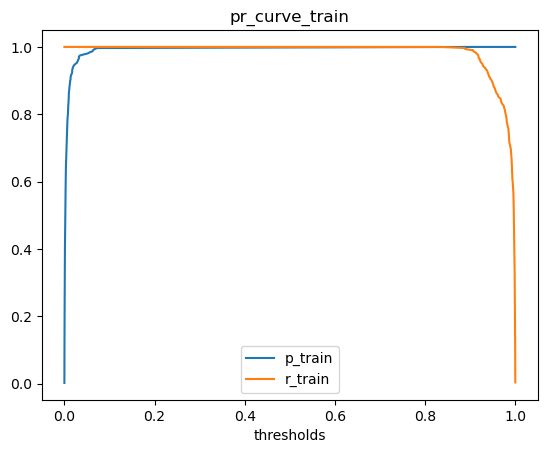

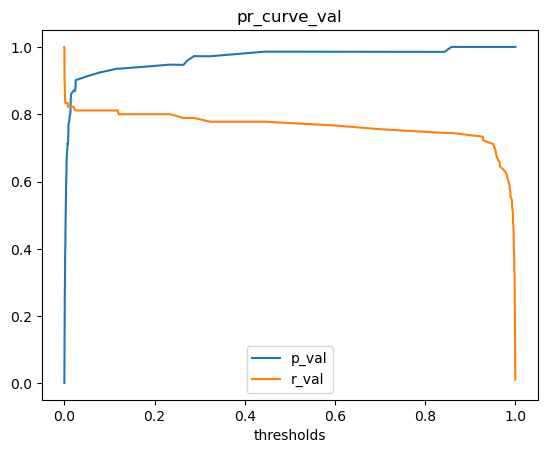

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...):::
 train

 [[305   0]
 [  0 305]]

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       305
           1       1.00      1.00      1.00       305

    accuracy                           1.00

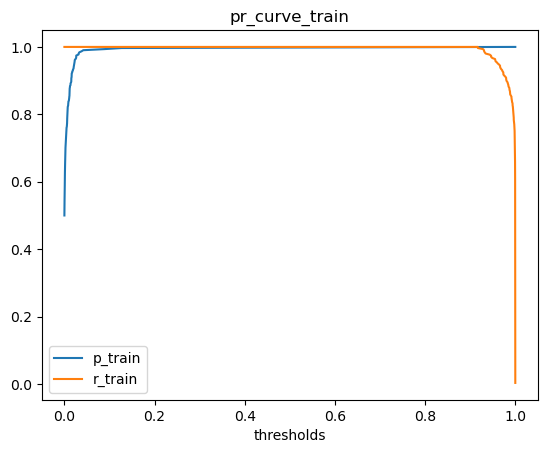

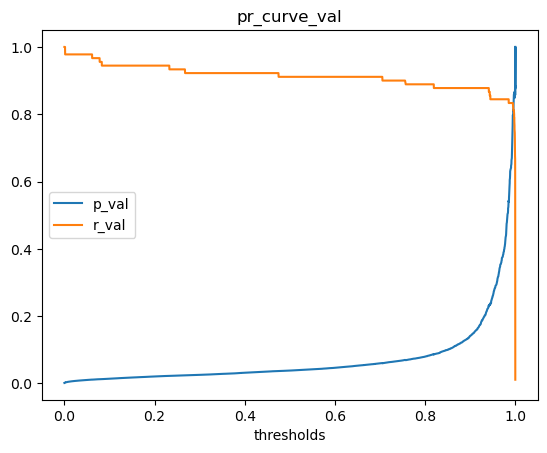

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...):::
 train

 [[170579      0]
 [     0 170579]]

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    170579
           1       1.00      1.00      1.00    170579

    accuracy                   

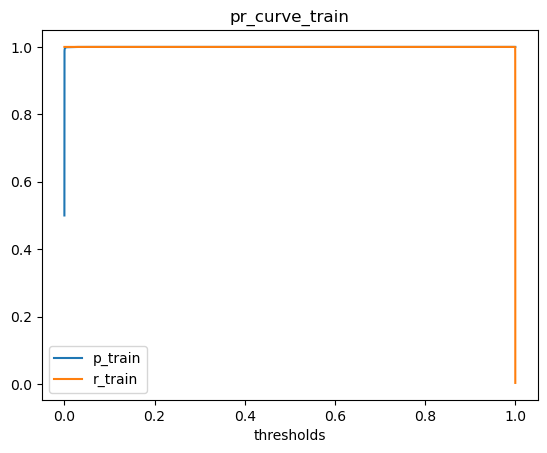

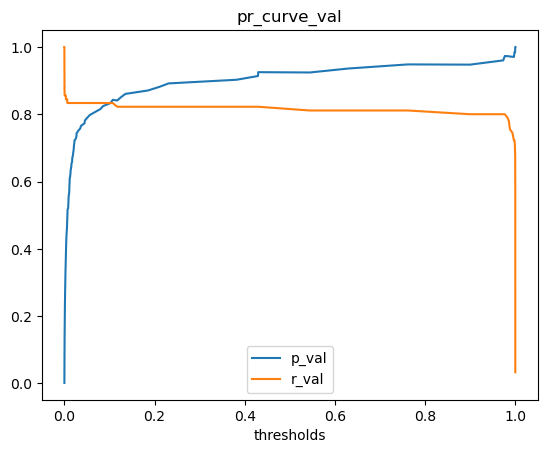

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...):::
 train

 [[170579      0]
 [     0 170579]]

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    170579
           1       1.00      1.00      1.00    170579

    accuracy                   

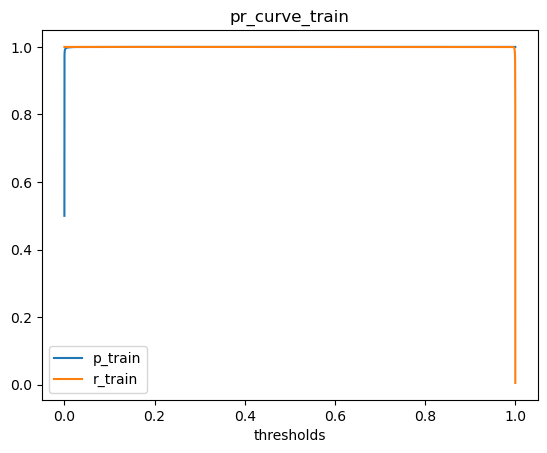

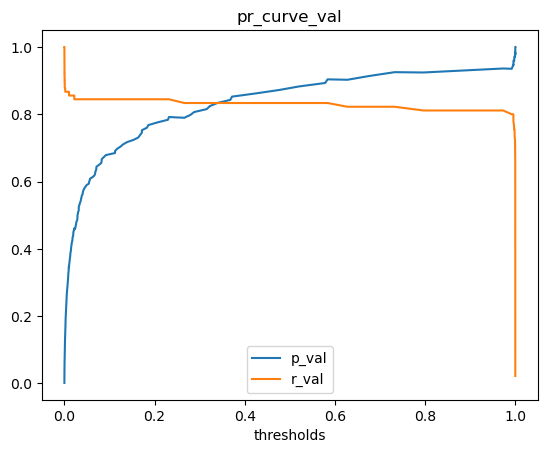

In [22]:
history_xgbc={}

history_xgbc[1]=xgbc_model(df_train,df_val,degree=1,over_or_under="none",under_res_factor=1,over_res_factor=1)
history_xgbc[2]=xgbc_model(df_train,df_val,degree=1,over_or_under="under",under_res_factor=1,over_res_factor=1)
history_xgbc[3]=xgbc_model(df_train,df_val,degree=1,over_or_under="over",under_res_factor=1,over_res_factor=1)
history_xgbc[4]=xgbc_model(df_train,df_val,degree=1,over_or_under="smote",under_res_factor=1,over_res_factor=1)





In [23]:
history_xgbc

{1: {'model': XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, random_state=42, ...),
  'pipeline_pre': Pipeline(steps=[('scaler', StandardScaler()),
                  ('poly', PolynomialFeatures(degree=1))]),
  'over_or_under': 'none',
  'degree': 1,
  'pca_or_not': 'not',
  'n_pca': 7,
  'und

# VotingClassifier for best models

In [24]:
x_train,y_train,x_val,y_val,pipeline_pre=data_prepare(df_train,df_val,degree=1,over_or_under="none",under_res_factor=2,over_res_factor=1,pca_or_not="not",n_pca=7)

In [25]:
model1=history_lg[2]['model']  #history_knn[2]['model']

model2=history_rf[3]["model"]

voting_clf = VotingClassifier(
    estimators=[('lg', model1),
                ('rf', model2)
               ],
    voting='soft' ,weights=[1.5,2]
)

voting_clf.fit(x_train, y_train)

y_val_pred_voting = voting_clf.predict(x_val)

y_val_pred_voting_prop=voting_clf.predict_proba(x_val) [:,1]

val_report = classification_report(y_val, y_val_pred_voting)
confusion_val = confusion_matrix(y_val, y_val_pred_voting)

print("Classification Report:")
print(val_report)

print("Confusion Matrix:")
print(confusion_val)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56870
           1       0.94      0.71      0.81        90

    accuracy                           1.00     56960
   macro avg       0.97      0.86      0.90     56960
weighted avg       1.00      1.00      1.00     56960

Confusion Matrix:
[[56866     4]
 [   26    64]]


pr_auc_val= 0.8474858650322481


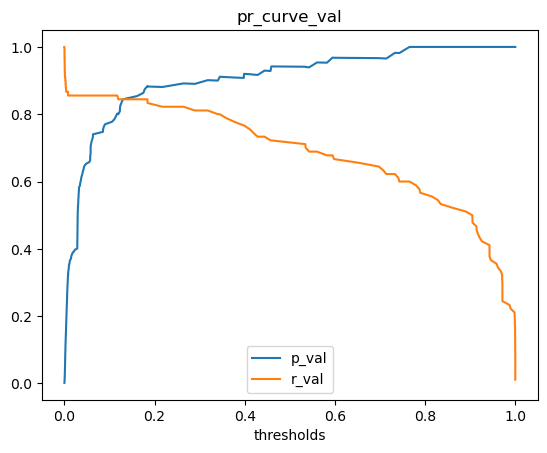

In [26]:
pt,rt,tht=precision_recall_curve(y_val,y_val_pred_voting_prop)

pr_auc_val=auc(rt,pt)

print(f"pr_auc_val= {pr_auc_val}")

plt.plot(tht,pt[:-1],label="p_val")
plt.plot(tht,rt[:-1],label="r_val")
plt.title("pr_curve_val")
plt.xlabel("thresholds")
plt.legend()
plt.show()


In [20]:
model2=history_xgbc[1]["model"]
y_val_pred=model2.predict(x_val)

val_report = classification_report(y_val, y_val_pred)
confusion_val = confusion_matrix(y_val, y_val_pred)

print("Classification Report:")
print(val_report)

print("Confusion Matrix:")
print(confusion_val)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56870
           1       0.99      0.77      0.86        90

    accuracy                           1.00     56960
   macro avg       0.99      0.88      0.93     56960
weighted avg       1.00      1.00      1.00     56960

Confusion Matrix:
[[56869     1]
 [   21    69]]


# Testing time 

In [27]:
y_test=df_test["Class"]
x_test=df_test.drop(columns=["Class"])

x_test=history_rf[3]['pipeline_pre'].transform(x_test)

y_test_pred=history_rf[3]["model"].predict(x_test)
y_test_pred_prop=history_rf[3]["model"].predict_proba(x_test) [:,1]

test_report = classification_report(y_test, y_test_pred)
confusion_test = confusion_matrix(y_test, y_test_pred)

print("Classification Report:")
print(test_report)

print("Confusion Matrix:")
print(confusion_test)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.90      0.78      0.84        97

    accuracy                           1.00     56960
   macro avg       0.95      0.89      0.92     56960
weighted avg       1.00      1.00      1.00     56960

Confusion Matrix:
[[56855     8]
 [   21    76]]


pr_auc_test= 0.8528259907655121


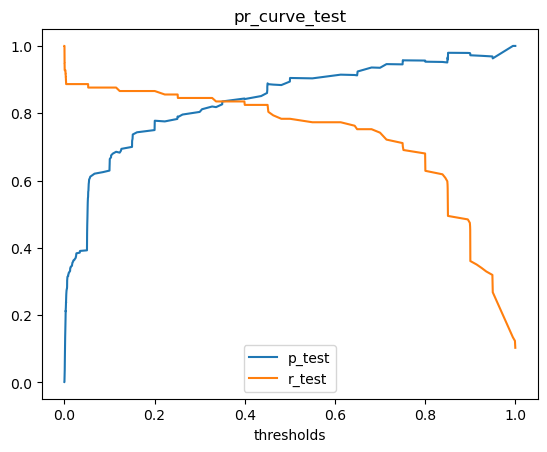

In [28]:
pt,rt,tht=precision_recall_curve(y_test,y_test_pred_prop)

pr_auc_test=auc(rt,pt)

print(f"pr_auc_test= {pr_auc_test}")

plt.plot(tht,pt[:-1],label="p_test")
plt.plot(tht,rt[:-1],label="r_test")
plt.title("pr_curve_test")
plt.xlabel("thresholds")
plt.legend()
plt.show()


# KNN

In [29]:
def knn_model(df_train,df_val,degree=1,over_or_under="none",under_res_factor=1,over_res_factor=1,k=5,pca_or_not="not",n_pca=7): 
    
    
    x_train,y_train,x_val,y_val,pipeline_pre=data_prepare (df_train,df_val,degree=degree,over_or_under=over_or_under,under_res_factor=under_res_factor,over_res_factor=over_res_factor,pca_or_not=pca_or_not,n_pca=n_pca)

    model, x_train,y_train,y_train_predict_prop,y_train_predict,x_val,y_val,y_val_predict_prop,y_val_predict,f1_train_postive,f1_val_postive,f1_macro_avg_train_postive,f1_macro_avg_val_postive=train_val_models(KNeighborsClassifier(n_neighbors=k),x_train,y_train,x_val,y_val)

    pt,rt,tht,pv,rv,thv,pr_auc_train,pr_auc_val=pr_curve(y_train,y_train_predict_prop,y_val,y_val_predict_prop)

    hist_knn={"model":model,
            "pipeline_pre":pipeline_pre,
             "over_or_under":over_or_under,
             "degree":degree ,
              "n_neighbors":k,
             "pca_or_not":pca_or_not, 
             "n_pca":n_pca, 
             "under_res_factor":under_res_factor, 
             "over_res_factor":over_res_factor,
            "pr_auc_train":pr_auc_train, 
            "pr_auc_val":pr_auc_val, 
            "f1_train_postive":f1_train_postive, 
            "f1_val_postive":f1_val_postive, 
            "f1_macro_avg_train_postive":f1_macro_avg_train_postive, 
            "f1_macro_avg_val_postive":f1_macro_avg_val_postive}
    
    return hist_knn

KNeighborsClassifier(n_neighbors=3):::
 train

 [[170573      6]
 [    59    246]]

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    170579
           1       0.98      0.81      0.88       305

    accuracy                           1.00    170884
   macro avg       0.99      0.90      0.94    170884
weighted avg       1.00      1.00      1.00    170884
 
::::::
     val

 [[56868     2]
 [   24    66]]

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56870
           1       0.97      0.73      0.84        90

    accuracy                           1.00     56960
   macro avg       0.99      0.87      0.92     56960
weighted avg       1.00      1.00      1.00     56960
 
pr_auc_train= 0.9738280640124902
pr_auc_val= 0.8715963178129611


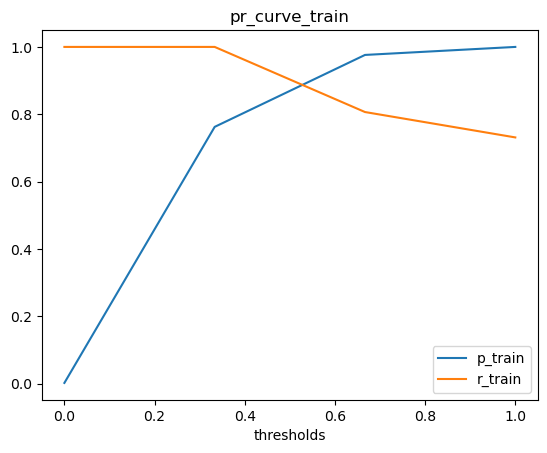

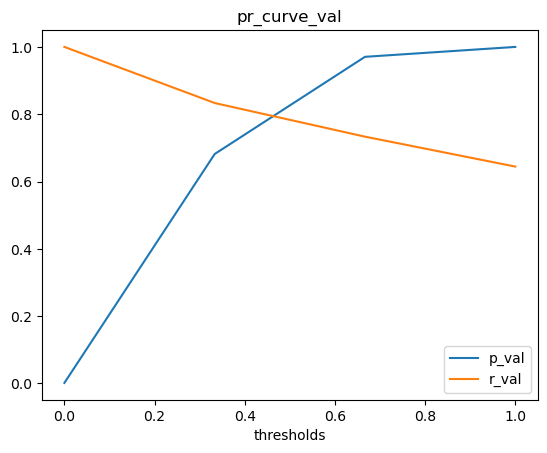

KNeighborsClassifier():::
 train

 [[170569     10]
 [    63    242]]

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    170579
           1       0.96      0.79      0.87       305

    accuracy                           1.00    170884
   macro avg       0.98      0.90      0.93    170884
weighted avg       1.00      1.00      1.00    170884
 
::::::
     val

 [[56865     5]
 [   20    70]]

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56870
           1       0.93      0.78      0.85        90

    accuracy                           1.00     56960
   macro avg       0.97      0.89      0.92     56960
weighted avg       1.00      1.00      1.00     56960
 
pr_auc_train= 0.9576931196055309
pr_auc_val= 0.8715305268755754


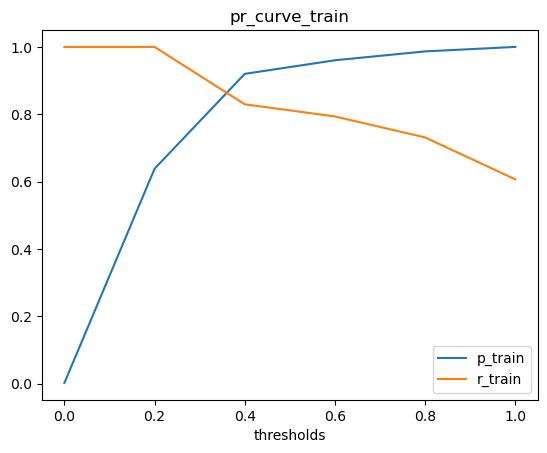

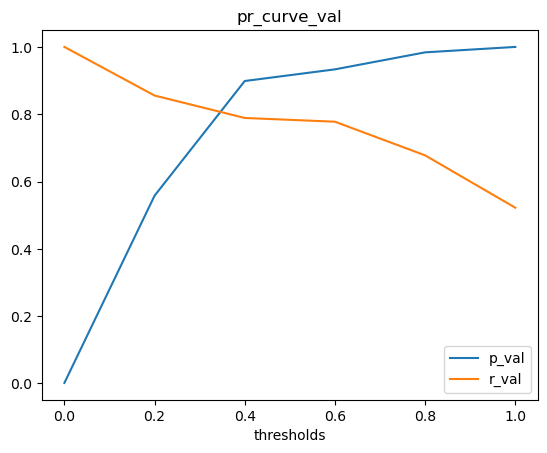

KNeighborsClassifier(n_neighbors=7):::
 train

 [[170566     13]
 [    71    234]]

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    170579
           1       0.95      0.77      0.85       305

    accuracy                           1.00    170884
   macro avg       0.97      0.88      0.92    170884
weighted avg       1.00      1.00      1.00    170884
 
::::::
     val

 [[56864     6]
 [   23    67]]

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56870
           1       0.92      0.74      0.82        90

    accuracy                           1.00     56960
   macro avg       0.96      0.87      0.91     56960
weighted avg       1.00      1.00      1.00     56960
 
pr_auc_train= 0.9431652060283595
pr_auc_val= 0.8677151139125272


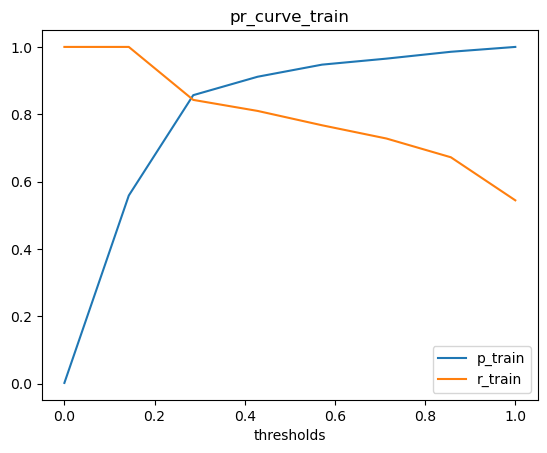

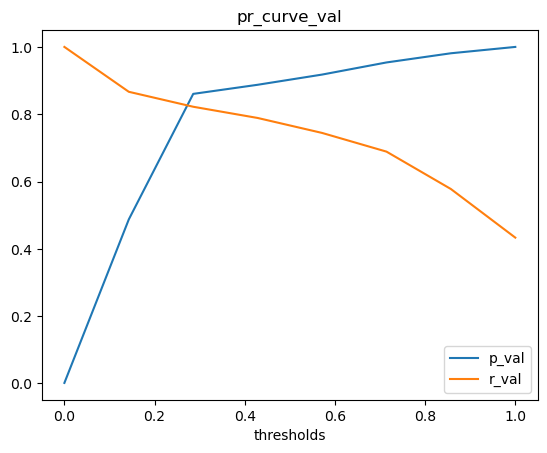

KNeighborsClassifier(n_neighbors=3):::
 train

 [[170567     12]
 [    65    240]]

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    170579
           1       0.95      0.79      0.86       305

    accuracy                           1.00    170884
   macro avg       0.98      0.89      0.93    170884
weighted avg       1.00      1.00      1.00    170884
 
::::::
     val

 [[56868     2]
 [   28    62]]

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56870
           1       0.97      0.69      0.81        90

    accuracy                           1.00     56960
   macro avg       0.98      0.84      0.90     56960
weighted avg       1.00      1.00      1.00     56960
 
pr_auc_train= 0.9659691269421571
pr_auc_val= 0.8248014219229468


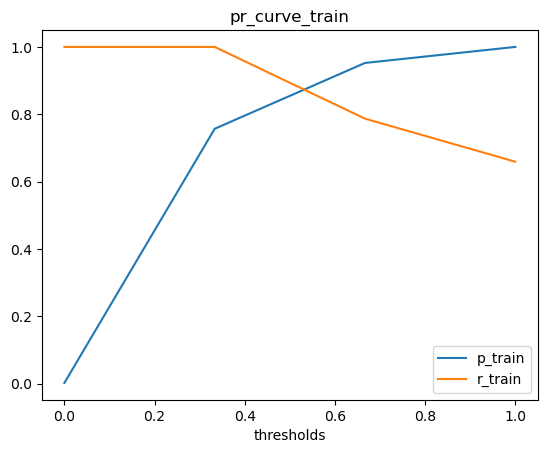

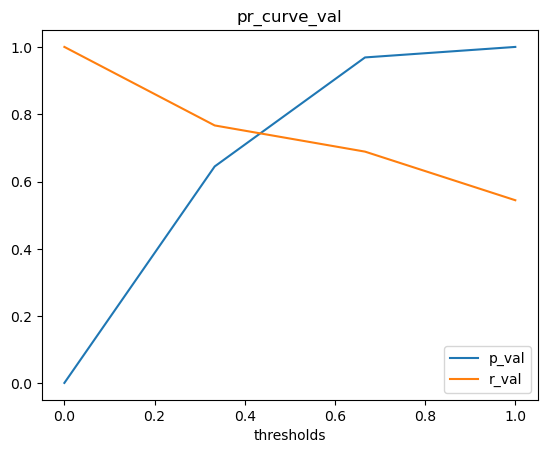

KNeighborsClassifier():::
 train

 [[170563     16]
 [    80    225]]

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    170579
           1       0.93      0.74      0.82       305

    accuracy                           1.00    170884
   macro avg       0.97      0.87      0.91    170884
weighted avg       1.00      1.00      1.00    170884
 
::::::
     val

 [[56868     2]
 [   26    64]]

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56870
           1       0.97      0.71      0.82        90

    accuracy                           1.00     56960
   macro avg       0.98      0.86      0.91     56960
weighted avg       1.00      1.00      1.00     56960
 
pr_auc_train= 0.9445348621375085
pr_auc_val= 0.8369526184125904


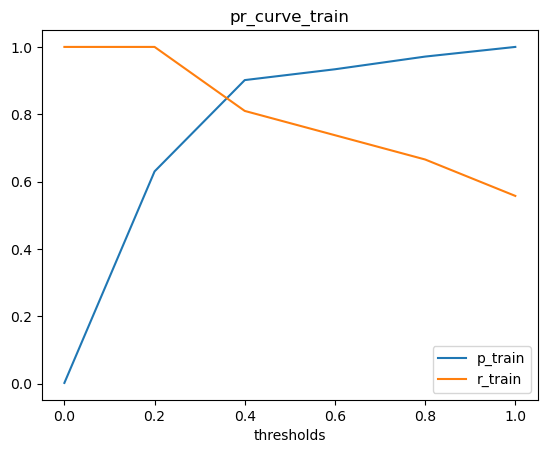

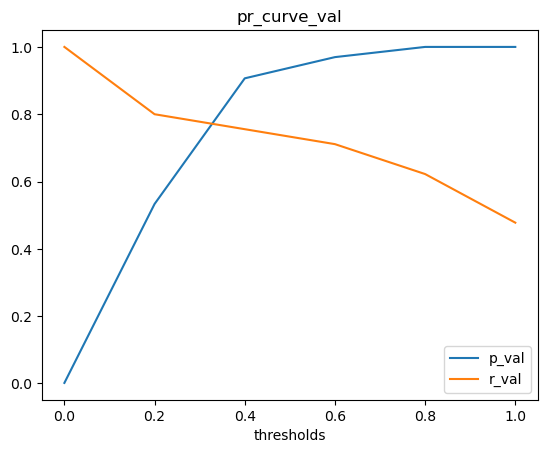

KNeighborsClassifier(n_neighbors=3):::
 train

 [[170571      8]
 [    58    247]]

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    170579
           1       0.97      0.81      0.88       305

    accuracy                           1.00    170884
   macro avg       0.98      0.90      0.94    170884
weighted avg       1.00      1.00      1.00    170884
 
::::::
     val

 [[56865     5]
 [   19    71]]

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56870
           1       0.93      0.79      0.86        90

    accuracy                           1.00     56960
   macro avg       0.97      0.89      0.93     56960
weighted avg       1.00      1.00      1.00     56960
 
pr_auc_train= 0.9710031979765701
pr_auc_val= 0.8494660418858042


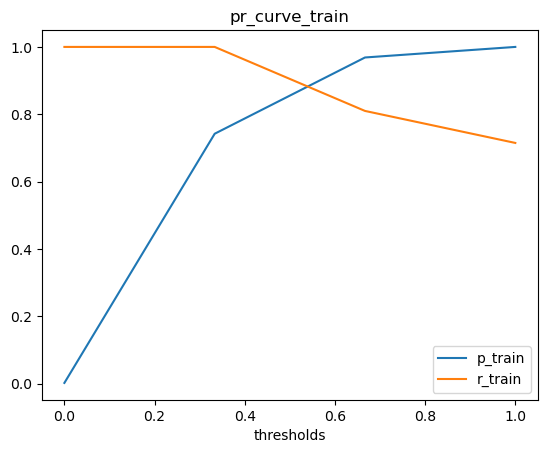

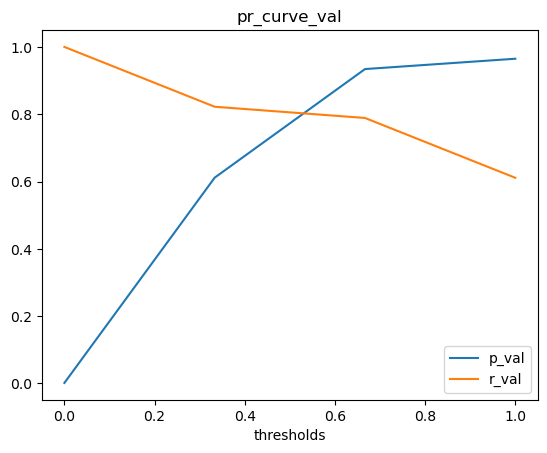

KNeighborsClassifier():::
 train

 [[170565     14]
 [    68    237]]

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    170579
           1       0.94      0.78      0.85       305

    accuracy                           1.00    170884
   macro avg       0.97      0.89      0.93    170884
weighted avg       1.00      1.00      1.00    170884
 
::::::
     val

 [[56865     5]
 [   19    71]]

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56870
           1       0.93      0.79      0.86        90

    accuracy                           1.00     56960
   macro avg       0.97      0.89      0.93     56960
weighted avg       1.00      1.00      1.00     56960
 
pr_auc_train= 0.9488783400423504
pr_auc_val= 0.8559152169135837


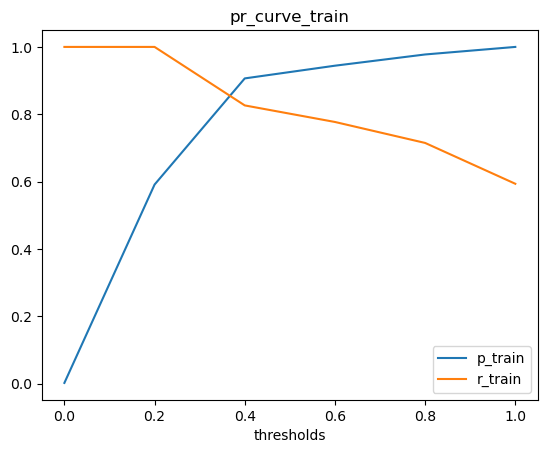

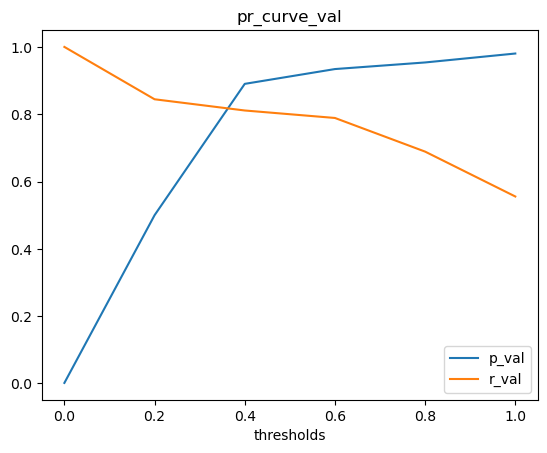

KNeighborsClassifier(n_neighbors=3):::
 train

 [[170563     16]
 [    92    213]]

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    170579
           1       0.93      0.70      0.80       305

    accuracy                           1.00    170884
   macro avg       0.96      0.85      0.90    170884
weighted avg       1.00      1.00      1.00    170884
 
::::::
     val

 [[56864     6]
 [   31    59]]

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56870
           1       0.91      0.66      0.76        90

    accuracy                           1.00     56960
   macro avg       0.95      0.83      0.88     56960
weighted avg       1.00      1.00      1.00     56960
 
pr_auc_train= 0.9342594331649966
pr_auc_val= 0.7723557509727235


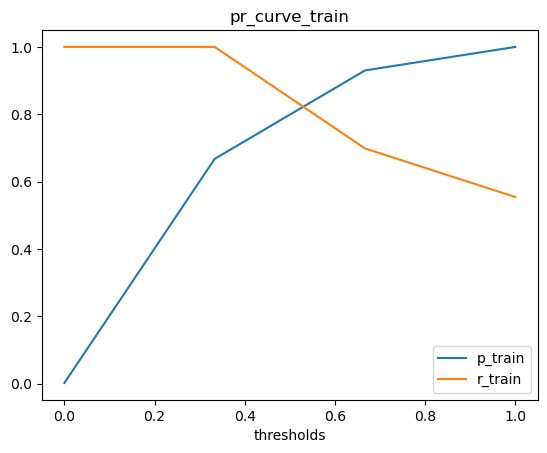

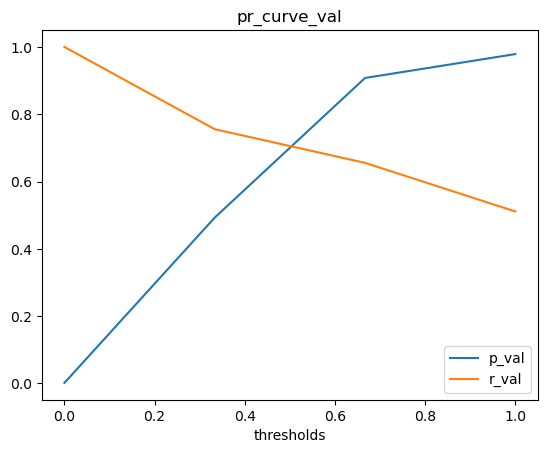

KNeighborsClassifier():::
 train

 [[170562     17]
 [   104    201]]

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    170579
           1       0.92      0.66      0.77       305

    accuracy                           1.00    170884
   macro avg       0.96      0.83      0.88    170884
weighted avg       1.00      1.00      1.00    170884
 
::::::
     val

 [[56866     4]
 [   36    54]]

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56870
           1       0.93      0.60      0.73        90

    accuracy                           1.00     56960
   macro avg       0.97      0.80      0.86     56960
weighted avg       1.00      1.00      1.00     56960
 
pr_auc_train= 0.8968126500331
pr_auc_val= 0.7639377539798589


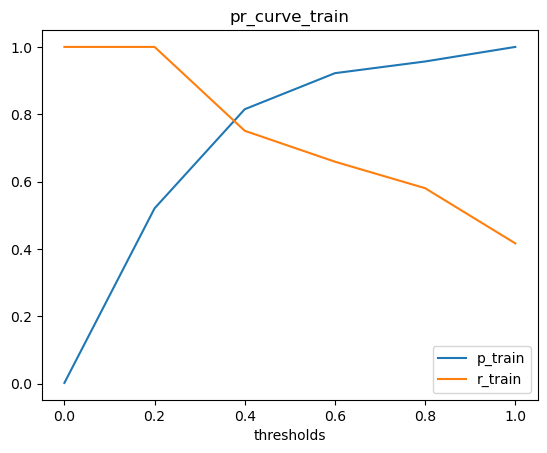

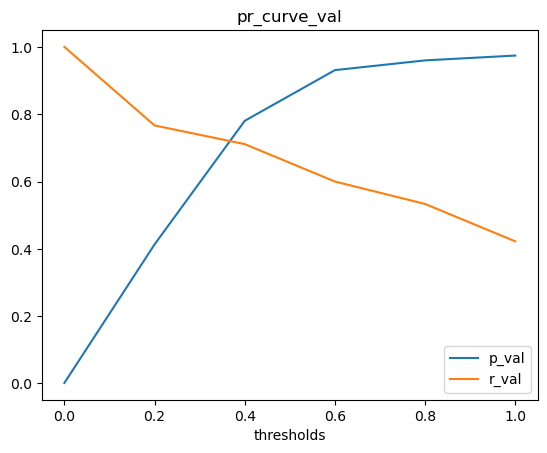

In [30]:
history_knn={}

history_knn[1]=knn_model(df_train,df_val,degree=1,over_or_under="none",under_res_factor=1,over_res_factor=1,k=3)
history_knn[2]=knn_model(df_train,df_val,degree=1,over_or_under="none",under_res_factor=1,over_res_factor=1,k=5)
history_knn[3]=knn_model(df_train,df_val,degree=1,over_or_under="none",under_res_factor=1,over_res_factor=1,k=7)

history_knn[4]=knn_model(df_train,df_val,degree=1,over_or_under="none",under_res_factor=1,over_res_factor=1,k=3,pca_or_not="pca",n_pca=7)
history_knn[5]=knn_model(df_train,df_val,degree=1,over_or_under="none",under_res_factor=1,over_res_factor=1,k=5,pca_or_not="pca",n_pca=7)
history_knn[6]=knn_model(df_train,df_val,degree=1,over_or_under="none",under_res_factor=1,over_res_factor=1,k=3,pca_or_not="pca",n_pca=8)
history_knn[7]=knn_model(df_train,df_val,degree=1,over_or_under="none",under_res_factor=1,over_res_factor=1,k=5,pca_or_not="pca",n_pca=8)
history_knn[8]=knn_model(df_train,df_val,degree=1,over_or_under="none",under_res_factor=1,over_res_factor=1,k=3,pca_or_not="pca",n_pca=6)
history_knn[9]=knn_model(df_train,df_val,degree=1,over_or_under="none",under_res_factor=1,over_res_factor=1,k=5,pca_or_not="pca",n_pca=6)


In [32]:
history_knn

{1: {'model': KNeighborsClassifier(n_neighbors=3),
  'pipeline_pre': Pipeline(steps=[('scaler', StandardScaler()),
                  ('poly', PolynomialFeatures(degree=1))]),
  'over_or_under': 'none',
  'degree': 1,
  'n_neighbors': 3,
  'pca_or_not': 'not',
  'n_pca': 7,
  'under_res_factor': 1,
  'over_res_factor': 1,
  'pr_auc_train': 0.9738280640124902,
  'pr_auc_val': 0.8715963178129611,
  'f1_train_postive': 0.8833034111310593,
  'f1_val_postive': 0.8354430379746834,
  'f1_macro_avg_train_postive': 0.9415564565846937,
  'f1_macro_avg_val_postive': 0.9176072453282991},
 2: {'model': KNeighborsClassifier(),
  'pipeline_pre': Pipeline(steps=[('scaler', StandardScaler()),
                  ('poly', PolynomialFeatures(degree=1))]),
  'over_or_under': 'none',
  'degree': 1,
  'n_neighbors': 5,
  'pca_or_not': 'not',
  'n_pca': 7,
  'under_res_factor': 1,
  'over_res_factor': 1,
  'pr_auc_train': 0.9576931196055309,
  'pr_auc_val': 0.8715305268755754,
  'f1_train_postive': 0.8689407540

# Testing time 

In [81]:
import time

In [31]:
y_test=df_test["Class"]
x_test=df_test.drop(columns=["Class"])

x_test=history_knn[2]['pipeline_pre'].transform(x_test)

print(x_test.shape)

start=time.time()
y_test_pred=history_knn[2]["model"].predict(x_test)
end=time.time()

y_test_pred_prop=history_knn[2]["model"].predict_proba(x_test) [:,1]

test_report = classification_report(y_test, y_test_pred)
confusion_test = confusion_matrix(y_test, y_test_pred)

print(f"takes {round(end-start)} s")

print("Classification Report:")
print(test_report)

print("Confusion Matrix:")
print(confusion_test)

pt,rt,tht=precision_recall_curve(y_test,y_test_pred_prop)

pr_auc_test=auc(rt,pt)

print(f"pr_auc_test= {pr_auc_test}")

plt.plot(tht,pt[:-1],label="p_test")
plt.plot(tht,rt[:-1],label="r_test")
plt.title("pr_curve_test")
plt.xlabel("thresholds")
plt.legend()
plt.show()


(56960, 31)


NameError: name 'time' is not defined

In [ ]:
y_test=df_test["Class"]
x_test=df_test.drop(columns=["Class"])

x_test=history_knn[1]['pipeline_pre'].transform(x_test)

print(x_test.shape)

start=time.time()
y_test_pred=history_knn[1]["model"].predict(x_test)
end=time.time()

y_test_pred_prop=history_knn[1]["model"].predict_proba(x_test) [:,1]

test_report = classification_report(y_test, y_test_pred)
confusion_test = confusion_matrix(y_test, y_test_pred)

print(f"takes {round(end-start)} s")
print()
print("Classification Report:")
print(test_report)

print("Confusion Matrix:")
print(confusion_test)

pt,rt,tht=precision_recall_curve(y_test,y_test_pred_prop)

pr_auc_test=auc(rt,pt)

print(f"pr_auc_test= {pr_auc_test}")

plt.plot(tht,pt[:-1],label="p_test")
plt.plot(tht,rt[:-1],label="r_test")
plt.title("pr_curve_test")
plt.xlabel("thresholds")
plt.legend()
plt.show()


In [ ]:
y_test=df_test["Class"]
x_test=df_test.drop(columns=["Class"])

x_test=history_knn[4]['pipeline_pre'].transform(x_test)

print(x_test.shape)
  # 8 is the best till now and 7 

start=time.time()
y_test_pred=history_knn[4]["model"].predict(x_test)
end=time.time()

y_test_pred_prop=history_knn[4]["model"].predict(x_test) [:,1]

test_report = classification_report(y_test, y_test_pred)
confusion_test = confusion_matrix(y_test, y_test_pred)

print(f"takes {round(end-start)} s")
print()

print("Classification Report:")
print(test_report)

print("Confusion Matrix:")
print(confusion_test)
print()

pt,rt,tht=precision_recall_curve(y_test,y_test_pred_prop)

pr_auc_test=auc(rt,pt)

print(f"pr_auc_test= {pr_auc_test}")

plt.plot(tht,pt[:-1],label="p_test")
plt.plot(tht,rt[:-1],label="r_test")
plt.title("pr_curve_test")
plt.xlabel("thresholds")
plt.legend()
plt.show()


In [ ]:
y_test=df_test["Class"]
x_test=df_test.drop(columns=["Class"])

x_test=history_knn[5]['pipeline_pre'].transform(x_test)

print(x_test.shape)
  # 8 is the best till now and 7 

start=time.time()
y_test_pred=history_knn[5]["model"].predict(x_test)
end=time.time()

y_test_pred_prop=history_knn[5]["model"].predict(x_test) [:,1]

test_report = classification_report(y_test, y_test_pred)
confusion_test = confusion_matrix(y_test, y_test_pred)

print(f"takes {round(end-start)} s")
print()

print("Classification Report:")
print(test_report)

print("Confusion Matrix:")
print(confusion_test)
print()

pt,rt,tht=precision_recall_curve(y_test,y_test_pred_prop)

pr_auc_test=auc(rt,pt)

print(f"pr_auc_test= {pr_auc_test}")

plt.plot(tht,pt[:-1],label="p_test")
plt.plot(tht,rt[:-1],label="r_test")
plt.title("pr_curve_test")
plt.xlabel("thresholds")
plt.legend()
plt.show()


In [ ]:
y_test=df_test["Class"]
x_test=df_test.drop(columns=["Class"])

x_test=history_knn[6]['pipeline_pre'].transform(x_test)

print(x_test.shape)
  # 8 is the best till now and 7 

start=time.time()
y_test_pred=history_knn[6]["model"].predict(x_test)
end=time.time()

y_test_pred_prop=history_knn[6]["model"].predict(x_test) [:,1]

test_report = classification_report(y_test, y_test_pred)
confusion_test = confusion_matrix(y_test, y_test_pred)

print(f"takes {round(end-start)} s")
print()

print("Classification Report:")
print(test_report)

print("Confusion Matrix:")
print(confusion_test)
print()

pt,rt,tht=precision_recall_curve(y_test,y_test_pred_prop)

pr_auc_test=auc(rt,pt)

print(f"pr_auc_test= {pr_auc_test}")

plt.plot(tht,pt[:-1],label="p_test")
plt.plot(tht,rt[:-1],label="r_test")
plt.title("pr_curve_test")
plt.xlabel("thresholds")
plt.legend()
plt.show()


In [ ]:
y_test=df_test["Class"]
x_test=df_test.drop(columns=["Class"])

x_test=history_knn[7]['pipeline_pre'].transform(x_test)

print(x_test.shape)
  # 8 is the best till now and 7 

start=time.time()
y_test_pred=history_knn[7]["model"].predict(x_test)
end=time.time()

y_test_pred_prop=history_knn[7]["model"].predict(x_test) [:,1]

test_report = classification_report(y_test, y_test_pred)
confusion_test = confusion_matrix(y_test, y_test_pred)

print(f"takes {round(end-start)} s")
print()

print("Classification Report:")
print(test_report)

print("Confusion Matrix:")
print(confusion_test)
print()

pt,rt,tht=precision_recall_curve(y_test,y_test_pred_prop)

pr_auc_test=auc(rt,pt)

print(f"pr_auc_test= {pr_auc_test}")

plt.plot(tht,pt[:-1],label="p_test")
plt.plot(tht,rt[:-1],label="r_test")
plt.title("pr_curve_test")
plt.xlabel("thresholds")
plt.legend()
plt.show()
